In [1]:

%reload_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/xilinx/jupyter_notebooks/')
# sys.path.append('D:\\_Lib\\python\\qick\\qick_lib')
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os

import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

# ZIQIAN IMPORTS
## Import modules from parent and multimode expts

In [4]:
import json
import os

# Get the current working directory
path = 'D:\\_Lib\python\\multimode_expts\\analysis_notebooks'
print("Current Path:", path)

# Isolate the parent directory
parent_path = 'D:\\_Lib\python\\multimode_expts'
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: D:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: D:\_Lib\python\multimode_expts


In [5]:
import sys

# Path to add
expts_path = 'D:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


['c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\Pythonwin', '/home/xilinx/jupyter_notebooks/', 'C:\\_L

In [6]:
from multimode_expts.fit_display import *

ModuleNotFoundError: No module named 'experiments.fitting'

In [ ]:
import experiments.fitting as fitter
from numpy.linalg import inv

## Exp path

In [ ]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'F:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from F:\Shared drives\SLab\Multimode\experiment\240911\data1


In [ ]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path + file_name

ds_stor_man_swap = storage_man_swap_dataset(file_path)

In [ ]:
ds_stor_man_swap.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.660,0.03,0.942926,0.465943,3000,2025-01-21 16:12:51.119011
1,M1-S2,521.230,0.05,1.069160,0.531718,5000,2025-01-21 16:17:17.763411
2,M1-S3,696.980,0.03,1.256963,0.613370,9000,2025-01-21 16:17:39.113328
3,M1-S4,876.380,0.03,1.235632,0.622603,9000,2025-01-21 16:17:54.523998
4,M1-S5,1053.950,0.03,1.882097,0.985547,7500,2025-01-21 16:18:31.141469
5,M1-S6,1245.525,0.03,1.500950,0.732998,13500,2025-01-21 16:32:20.759195
6,M1-S7,1423.275,0.03,2.153588,1.085899,10000,2025-01-21 16:32:02.177572
7,M1-S8,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3


# MY IMPORTS

## Import modules from parent and multimode expts

In [48]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = path #os.path.dirname(path)
grand_parent_path = os.path.dirname(parent_path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks\RAQM paper
Parent Path: c:\_Lib\python\multimode_expts\analysis_notebooks\RAQM paper


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'
saving_dataset_path = r'H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\RAQM paper', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\RAQM paper', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.c

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


In [23]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path +  file_name

ds_stor_man_swap = storage_man_swap_dataset(file_path)

In [24]:
file_path

'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\RAQM paper\\man1_storage_swap_dataset.csv'

In [25]:
ds_stor_man_swap.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.415,0.010,0.977143,0.488571,3000,2024-10-26 17:42:46.915401
1,M1-S2,520.925,0.010,1.130904,0.565452,5000,2024-10-26 17:43:09.376354
2,M1-S3,696.665,0.010,1.333910,0.666955,9000,2024-10-26 17:43:34.019332
3,M1-S4,875.845,0.010,1.254287,0.627144,9000,2024-10-26 17:43:51.867832
4,M1-S5,1053.395,0.010,1.973198,0.986599,7500,2024-10-26 17:44:14.975970
5,M1-S6,1245.160,0.010,1.595310,0.797655,13500,2024-10-26 17:44:34.143253
6,M1-S7,1423.040,0.010,1.685008,0.842504,13500,2024-10-26 17:44:51.587301
7,M1-S8,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3


# Load RBAM Expt data

In [26]:
name = 'all_storage_rbam'
folder =  folder # Ensure this variable is defined in your script

# Ensure the folder exists
os.makedirs(folder, exist_ok=True)

# File path to save the DataFrame
file_path = os.path.join(folder, f"{name}.csv")

# Save the DataFrame to a CSV file
df_all_rbam = pd.read_csv(file_path)

print(f"DataFrame read from {file_path}")

DataFrame read from H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\all_storage_rbam.csv


In [27]:
df_all_rbam['fidelity'][0]

'[0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422]'

# Load BS Data

In [28]:
# load BS data frame (without spectators)
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Load the data
df_bs = pd.read_csv(file_path)
df_bs

,Mode,file_list,name,fids_list,fids_post_list,fid,fid_err,fid_post,fid_post_err,Depth fit up to,...,ge_list,eg_list,ee_list,gg_list_err,ge_list_err,eg_list_err,ee_list_err,ebars_list,ebars_post_list,depth_fit_up_to
0,1,"[548, 549, 550, 551, 552, 553, 554, 555, 556, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.933563187108675, 0.92539176866761, 0.908718...","[0.994865836316126, 0.993013098261554, 0.99046...",0.996652,0.000072,0.998779,0.000169,2000,...,"[0.9085502306183065, 0.9057903676411931, 0.887...","[0.004686333863849433, 0.00637849709117257, 0....","[0.06175047902747567, 0.06822973424121748, 0.0...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0004359989629942819, 0.0006174559521902646,...","[0.0015981747296314585, 0.0018304495944191988,...","[0.0016098005294681022, 0.0018226997647139613,...","[0.0004799021448033312, 0.0006728531999346926,...",2000
1,2,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9356514245251336, 0.9242189803653471, 0.914...","[0.9950886744818882, 0.9935122956231536, 0.991...",0.997613,0.000013,0.999754,0.000101,2000,...,"[0.8957272139719534, 0.8840266115577843, 0.873...","[0.0044322282288122945, 0.005776719908511158, ...","[0.05991634724605409, 0.07000429972614167, 0.0...","[0.0022832745775030047, 0.0018772482133232158,...","[0.0022832745775030047, 0.0018772482133232158,...","[0.00043983346018930907, 0.0004906753514151476...","[0.0018721113801848717, 0.001540946897328571, ...","[0.0016098005294681022, 0.0018226997647139613,...","[0.00048243060740322136, 0.0005523446792671511...",2000
2,3,"[590, 591, 592, 593, 594, 595, 596, 597, 598, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.932848556683558, 0.9184909395360339, 0.9043...","[0.9953260202637892, 0.9926657260845021, 0.991...",0.997000,0.000019,0.999229,0.000145,2000,...,"[0.8890630812784109, 0.8752246533122903, 0.861...","[0.0041724998020788145, 0.006467488235228106, ...","[0.06297894351436314, 0.07504157222873784, 0.0...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0003559383392788671, 0.0005238370770952343,...","[0.001176226769595588, 0.001570598764562083, 0...","[0.0018364832264220945, 0.0014975954861458222,...","[0.00039949444035114164, 0.0005909073629860316...",2000
3,4,"[611, 612, 613, 614, 615, 616, 617, 618, 619, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9224996506107835, 0.8977564150549788, 0.877...","[0.9924848735561859, 0.9889322008290996, 0.985...",0.993877,0.000050,0.996009,0.000355,2000,...,"[0.8953524548427165, 0.8707604852155324, 0.853...","[0.006783837945321119, 0.00973645686574578, 0....","[0.07071651144389529, 0.0925071280792755, 0.10...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0005176444615874594, 0.0006221573958370889,...","[0.0016800866418539158, 0.0019553545429684908,...","[0.0018364832264220945, 0.0014975954861458222,...","[0.0005700234403086111, 0.0007143665655444077,...",2000
4,5,"[632, 633, 634, 635, 636, 637, 638, 639, 640, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.924224701154291, 0.8972516351072528, 0.8680...","[0.994061657262647, 0.9914303178857917, 0.9861...",0.993209,0.000068,0.997944,0.000094,2000,...,"[0.9077750642910327, 0.8827509904350767, 0.851...","[0.0054231752960300465, 0.007617899645197445, ...","[0.07035212354967885, 0.0951304652475498, 0.11...","[0.001587489521038847, 0.0023662620250462256, ...","[0.001587489521038847, 0.0023662620250462256, ...","[0.00041051773797976297, 0.0006694071490576667...","[0.0012095062061867597, 0.0021735478521388344,...","[0.0012115656976351553, 0.001564185678578712, ...","[0.00045023043163391213, 0.0007583637132156032...",2000
5,6,"[653, 654, 655, 656, 657, 658, 659, 660, 661, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.890094859149635, 0.8900864880228737

In [29]:
raw_fid = df_bs['fid'][1]
raw_fid_err = df_bs['fid_err'][1]
ps_fid = df_bs['fid_post'][1]
ps_fid_err = df_bs['fid_post_err'][1]

print(f'Raw Fidelity: {raw_fid} +/- {raw_fid_err}')
print(f'Postselected Fidelity: {ps_fid} +/- {ps_fid_err}')
#convert to swap 
swap_fid = raw_fid**(3/2)
swap_fid_err = (3/2)*(raw_fid_err/raw_fid)*swap_fid

swap_ps_fid = ps_fid**(3/2)
swap_ps_fid_err = (3/2)*(ps_fid_err/ps_fid)*swap_ps_fid
# print 
print(f'Swap Fidelity: {1-swap_fid} +/- {swap_fid_err}')
print(f'Swap Postselected Fidelity: {1-swap_ps_fid} +/- {swap_ps_fid_err}')

Raw Fidelity: 0.9976126184234752 +/- 1.2711047686017907e-05
Postselected Fidelity: 0.9997540531201492 +/- 0.000101349151793
Swap Fidelity: 0.0035789341670343644 +/- 1.9043798338032696e-05
Swap Postselected Fidelity: 0.000368897635145915 +/- 0.00015200503165912747


# Collecting all errors

## get times for gate and idle

In [30]:
# def get_gate_time(mode): 
#     ''' 
#     gets BS time for a given mode
#     mode= S1, S2, ...
#     '''
#     return ds_stor_man_swap[''] 

def get_gate_time(mode): 
    ''' 
    gets BS time for a given mode
    mode= S1, S2, ...
    '''
    row = ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name']=='M1-' + str(mode)]
    return row['pi (mus)'].values[0]  # 1 fetch 

def get_M1Si_idle_time(mode): 
    ''' 
    gets idle time for a given mode when other modes are being acted upon
    mode= S1, S2, ...

    time for M1-S2, M1-S3, M1-S4, M1-S5, M1-S6, M1-S7 if target mode is S1
    '''
    modes = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
    time = 0 
    for m in modes:
        if m != mode:
            time += get_gate_time(m)
    return time

def get_loading_time(): # loading a single photon excitation into M1
    '''
    time to prepare OR stor a state into M1  (fetch)

    ge_pulse/2 + ef_pulse + f0g1_pulse
    '''
    ge_pulse = 35 * 4 *1e-3 /2
    ef_pulse = 35 * 4 * 1e-3
    M1_pulse = ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1']['pi (mus)'].values[0]
    return ge_pulse + ef_pulse + M1_pulse

def get_f0g1_time():
    M1_pulse = ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1']['pi (mus)'].values[0]
    return M1_pulse


# def get_f0g1_idle_time(mode): #
#     ''' 
#     gets BS time for a given mode
#     mode= S1, S2, ...
#     '''
#     modes = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
#     time = 0 
#     for m in modes:
#         if m != mode:
#             time += get_loading_time() * 1
#     return time


    

In [31]:
get_f0g1_time()

0.6056817916987671

In [32]:
columns = ['Mode', 'gate_time', 'f0g1_other_spec_targ_idle', 'M1_Si_other_spec_targ_idle']
modes = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']

data = []
for mode in modes:
    gate_time = get_gate_time(mode)
    f0g1_idle_time = get_loading_time() *6#get_f0g1_idle_time(mode)   # fetch for all spectator modes (1 way for all 6 )
    M1_Si_other_spec_targ_idle = get_M1Si_idle_time(mode)  # fetch for all spectator modes (1 way for all 6 )
    data.append([mode, gate_time, f0g1_idle_time, M1_Si_other_spec_targ_idle])

df_master = pd.DataFrame(data, columns=columns)
df_master



,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle
0,S1,0.977143,4.894091,8.972618
1,S2,1.130904,4.894091,8.818856
2,S3,1.333910,4.894091,8.615850
3,S4,1.254287,4.894091,8.695473
4,S5,1.973198,4.894091,7.976562
5,S6,1.595310,4.894091,8.354450
6,S7,1.685008,4.894091,8.264752


## Coherence

### Get the T1s

In [33]:
t1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
t1s_err = [6.0, 30.2, 12.7, 11.9, 5.5, 12.9, 6.4]
freq_t1s = [1/t1 for t1 in t1s]
df_master['kappa_t1s (MHz)'] = freq_t1s
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz)
0,S1,0.977143,4.894091,8.972618,0.002791
1,S2,1.130904,4.894091,8.818856,0.000797
2,S3,1.333910,4.894091,8.615850,0.001252
3,S4,1.254287,4.894091,8.695473,0.001674
4,S5,1.973198,4.894091,7.976562,0.002811
5,S6,1.595310,4.894091,8.354450,0.001696
6,S7,1.685008,4.894091,8.264752,0.002694


In [34]:
# from paper 


# Data from the LaTeX table
data = [
    ["Qubit ($Q$)", "$\omega_{q}$", 3.568, "493±13.1", "259±8.0", "370±14"],
    ["Coupler ($C$)", "$\omega_{c}$", 4.037, "45±0.8", "0.39±0.04", ""],
    ["Buffer 1", "$\omega_{b1}$", 4.984, "209±5.1", "75.5±3.8", "219±7.0"],
    ["Buffer 2", "$\omega_{b2}$", 5.158, "120±1.3", "70.6±5.4", "193±6.7"],
    ["Storage 1", "$\omega_{s1}$", 5.333, "358.3±6.0", "235.7±7.1", "551.6±16.8"],
    ["Storage 2", "$\omega_{s2}$", 5.505, "1254.8±30.2", "378.3±15.1", "1493.2±53.5"],
    ["Storage 3", "$\omega_{s3}$", 5.681, "799.0±12.7", "677.2±16.8", "1309.9±41.8"],
    ["Storage 4", "$\omega_{s4}$", 5.860, "597.4±11.9", "806.2±23.7", "972.4±29.8"],
    ["Storage 5", "$\omega_{s5}$", 6.037, "355.7±5.5", "591.8±15.2", "663.3±22.7"],
    ["Storage 6", "$\omega_{s6}$", 6.229, "589.5±12.9", "1071.1±63.0", "1048.4±54.1"],
    ["Storage 7", "$\omega_{s7}$", 6.407, "371.2±6.4", "663.5±29.0", "692.7±22.7"],
    ["Dump 1", "$\omega_{d1}$", 7.297, "0.73±0.03", "", ""],
    ["Dump 2", "$\omega_{d2}$", 7.252, "1.81±0.11", "", ""],
    ["Readout ($R$)", "$\omega_{r}$", 8.051, "0.05±0.01", "", ""]
]

# Convert into a NumPy array (for numerical processing, you can adjust column 3 and 4)
np_array = np.array(data)

freq_stor = np_array[:, 2][4:11].astype(float)

freq_stor

array([5.333, 5.505, 5.681, 5.86 , 6.037, 6.229, 6.407])

In [35]:
qc = np.array([15,500,
73.4,
42.5,
24.9,
47.4,
31.9])

# Q = omega * T1
q_total = freq_stor*1e3 * t1s * 2 * np.pi * 1e-6 # in million 

q_i = (1/q_total - 1/qc)**-1

t1_intrinsic = q_i/freq_stor*1e3/(2*np.pi) # in micro seconds
t1_intrinsic

array([1795.08887406, 1374.0758151 , 1306.74608733, 1238.26749708,
        776.39699121, 1148.55732685,  698.31895111])

In [36]:
new_qc = qc * (10**(2/3))#np.sqrt(10)
q_total = (1/q_i + 1/new_qc)**-1
t1_new = q_total/freq_stor*1e3/(2*np.pi) # in micro seconds
t1_new

array([ 963.06572639, 1346.500671  , 1149.38458035, 1005.80619448,
        618.73599801,  953.69966107,  586.89221283])

In [37]:
q = 25e6 
freq = 5.5 *1e3
t1 = q/freq /2/np.pi
t1

723.4315595086151

In [38]:
# omega = f * 2pi

### Get the T2s

In [39]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ModeT2s_and_echoes.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_t2_and_echo = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ModeT2s_and_echoes.csv


In [40]:
df_t2_and_echo

,target,type,file_no,name,t2,t2_err,return_args
0,1,T2,90,_stor_cavity_ramsey_sweep.h5,235.687931,7.102034,"[[1.8099999999999998, 3.6099999999999994, 5.40..."
1,1,T2_echo,91,_stor_cavity_ramsey_sweep.h5,551.567706,16.846464,"[[3.02, 6.02, 9.02, 12.02, 15.02, 18.02, 21.02..."
2,2,T2,92,_stor_cavity_ramsey_sweep.h5,378.310633,15.076063,"[[6.01, 12.01, 18.01, 24.01, 30.01, 36.01, 42...."
3,2,T2_echo,93,_stor_cavity_ramsey_sweep.h5,1493.194215,53.469139,NaN
4,3,T2,94,_stor_cavity_ramsey_sweep.h5,677.194120,16.847612,"[[4.81, 9.61, 14.409999999999998, 19.21, 24.01..."
5,3,T2_echo,95,_stor_cavity_ramsey_sweep.h5,1309.914525,41.804243,"[[8.02, 16.02, 24.02, 32.02, 40.02, 48.02, 56...."
6,4,T2,96,_stor_cavity_ramsey_sweep.h5,806.227803,23.684860,"[[4.21, 8.41, 12.610000000000001, 16.810000000..."
7,4,T2_echo,97,_stor_cavity_ramsey_sweep.h5,972.376941,29.846202,"[[7.02, 14.02, 21.02, 28.02, 35.02, 42.02, 49...."
8,5,T2,98,_stor_cavity_ramsey_sweep.h5,591.843259,15.246132,"[[3.6099999999999994, 7.209999999999999, 10.80..."
9,5,T2_echo,99,_stor_cavity_ramsey_sweep.h5,663.338928,22.742345,"[[6.02, 12.02, 18.02, 24.02, 30.02, 36.02, 42...."


In [41]:
# choose rows where type is 'T2'
reduced_df = df_t2_and_echo[df_t2_and_echo['type'] == 'T2']
reduced_df2= df_t2_and_echo[df_t2_and_echo['type'] == 'T2_echo']
T2s = reduced_df['t2'].values
T2echoes = reduced_df2['t2'].values
T2echoes


array([ 551.56770601, 1493.19421538, 1309.91452537,  972.37694081,
        663.33892833, 1048.35659569,  692.66803537])

In [42]:
np.average(1/T2echoes * 1e3)

1.1685182200568285

In [43]:
freqs_t2s = 1/T2s 
freqs_t2echoes = 1/T2echoes

In [44]:
# add T2s to the master DataFrame
df_master['kappa_T2 (MHz)'] =  freqs_t2s
df_master['kappa_T2_echo (MHz)'] =  freqs_t2echoes
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),kappa_T2_echo (MHz)
0,S1,0.977143,4.894091,8.972618,0.002791,0.004243,0.001813
1,S2,1.130904,4.894091,8.818856,0.000797,0.002643,0.000670
2,S3,1.333910,4.894091,8.615850,0.001252,0.001477,0.000763
3,S4,1.254287,4.894091,8.695473,0.001674,0.001240,0.001028
4,S5,1.973198,4.894091,7.976562,0.002811,0.001690,0.001508
5,S6,1.595310,4.894091,8.354450,0.001696,0.000934,0.000954
6,S7,1.685008,4.894091,8.264752,0.002694,0.001507,0.001444


### Idling: Coherence Error
$t_{C_1 fetch} = t_{f0g1} + t_{ef} + t_{ge}/2$


$$\epsilon_{decay} =  1- e^{-2 \kappa_{T1} \sum_{i = 1}^{6} (t_{C_1 fetch} + t_{C1Si})}$$

$$\epsilon_{dephasing} = 1-e^{-2 (\kappa_{t2} - (\kappa_{t1}/2))  \sum_{i = 1}^{6}(t_{C_1 fetch} + t_{C1Si})}$$

In [45]:
# get the max of the two and multiply by f0g1+M1si idle time 
decay_errs = []
dephasing_errs = []
for idx, mode in enumerate(modes): 
    kappa_t1 = df_master['kappa_t1s (MHz)'][idx]
    kappa_t2 = df_master['kappa_T2_echo (MHz)'][idx]
    f0g1_idle_time = df_master['f0g1_other_spec_targ_idle'][idx]
    M1_Si_idle_time = df_master['M1_Si_other_spec_targ_idle'][idx]
    decay_err = 1 - np.exp(-1 * kappa_t1 * (f0g1_idle_time + M1_Si_idle_time) * 2)
    dephasing_err = 1 - np.exp(-1 * (kappa_t2 - (kappa_t1/2)) * (f0g1_idle_time + M1_Si_idle_time) * 2)
    decay_errs.append(decay_err)
    dephasing_errs.append(dephasing_err)

print('decay_errs:', decay_errs)
print('dephasing_errs:', dephasing_errs)


decay_errs: [0.07448300255057883, 0.021619656636833073, 0.033251716745928306, 0.044476282607728734, 0.06981149946149745, 0.043953188271441346, 0.06844396837716449]
dephasing_errs: [0.011512896692832508, 0.0074112726830015685, 0.00371174248270556, 0.005189864797342847, 0.0026182163376348155, 0.0027967567175054553, 0.002541953748778858]


In [46]:
# df_master['idle:coherence_err'] = coherence_errs
df_master['idle:decay_err'] = decay_errs
df_master['idle:dephasing_err'] = dephasing_errs


### Gate: Coherence Error

Not needed since we have bare beamsplitter data which captures this effect

In [33]:
# get the max of the two and multiply by f0g1+M1si idle time 
coherence_errs = []
decay_errs = []
dephasing_errs = []
for idx, mode in enumerate(modes): 
    kappa_t1 = df_master['kappa_t1s (MHz)'][idx]
    kappa_t2 = df_master['kappa_T2_echo (MHz)'][idx]
    gate_time = get_gate_time(mode)
    # coherence_err = max(kappa_t1, kappa_t2) * gate_time
    # coherence_errs.append(coherence_err)
    decay_err = kappa_t1 * gate_time
    dephasing_err = (kappa_t2 - (kappa_t1/2)) * gate_time
    decay_errs.append(decay_err)
    dephasing_errs.append(dephasing_err)
    
coherence_errs
print('decay_errs:', decay_errs)
print('dephasing_errs:', dephasing_errs)

decay_errs: [0.0027271639886766877, 0.0009012623445120897, 0.0016694743429286607, 0.0020995772723832497, 0.00554736568368346, 0.002706208637047196, 0.004539353792548823]
dephasing_errs: [0.00040799173360888107, 0.0003067411629995706, 0.00018358117997491495, 0.00024013033440096836, 0.00020096238009170464, 0.00016862025314949794, 0.00016295755737584332]


In [34]:
# df_master['gate: coherence_err'] = coherence_errs
df_master['gate: decay_err'] = decay_errs
df_master['gate: dephasing_err'] = dephasing_errs


In [26]:
get_gate_time('S3')

1.33391

## Cross Kerr due to M1-Si gates (Storage access decoherence)

$$\epsilon_{SAD} =1 -  \prod_{j = 1; j \neq i}^{7} (1-\chi_{ij} 2(t_{C1Sj} + t_{f0g1}))$$

Effect of all possible idle transfers on Si

In [50]:
data_parent

'H:\\Shared drives\\SLab\\Multimode\\experiment\\240911'

In [52]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 't2s_with_spectators.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_ckerr_m1si = pd.read_csv(file_path)#, index=False)

print(f"DataFrame read from {file_path}")

DataFrame read from H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\t2s_with_spectators.csv


In [53]:
target = 'S1'
df_master[df_master['Mode'] == target]['kappa_T2 (MHz)'].values[0]


0.004242898628076846

In [54]:
ckerr_m1_si_mat = np.zeros((7,7))
ckerr_m1_si_mat_err = np.zeros((7,7))
t2_mat = np.zeros((7,7))
for i, row in df_ckerr_m1si.iterrows():
    target = row['target']
    spec = row['spectator']
    kappa_with_spec = 1/row['t2']
    t2_mat[target -1][spec -1] = row['t2']
    
    bare_kappa = df_master[df_master['Mode'] == 'S' + str(target)]['kappa_T2 (MHz)'].values[0]
    print(f"target: {target}, spec: {spec}, kappa_with_spec: {kappa_with_spec}, bare_kappa: {bare_kappa}")
    ckerr_m1_si_mat[target -1][spec -1] =  kappa_with_spec - bare_kappa
    ckerr_m1_si_mat_err[target -1][spec -1] = row['t2_err']


target: 1, spec: 1, kappa_with_spec: 0.004901960784313725, bare_kappa: 0.004242898628076846
target: 1, spec: 2, kappa_with_spec: 0.004480153394000584, bare_kappa: 0.004242898628076846
target: 1, spec: 3, kappa_with_spec: 0.005332053222275509, bare_kappa: 0.004242898628076846
target: 1, spec: 4, kappa_with_spec: 0.01142485688171289, bare_kappa: 0.004242898628076846
target: 1, spec: 5, kappa_with_spec: 0.006868290878749489, bare_kappa: 0.004242898628076846
target: 1, spec: 6, kappa_with_spec: 0.015497340562596777, bare_kappa: 0.004242898628076846
target: 1, spec: 7, kappa_with_spec: 0.010739298445427916, bare_kappa: 0.004242898628076846
target: 2, spec: 1, kappa_with_spec: 0.0089471877363005, bare_kappa: 0.002643330410313463
target: 2, spec: 2, kappa_with_spec: 0.002173913043478261, bare_kappa: 0.002643330410313463
target: 2, spec: 3, kappa_with_spec: 0.0024169123188611226, bare_kappa: 0.002643330410313463
target: 2, spec: 4, kappa_with_spec: 0.005107577575897636, bare_kappa: 0.002643330

In [55]:
target = 1
spec = 6
t2_mat[target - 1][spec - 1]

64.52720039033828

In [56]:
ckerr_m1_si_mat_err

array([[ 0.        ,  5.43149883,  3.39881354,  1.65499297,  2.46240744,
         1.67367514,  1.61460064],
       [ 6.65429163,  0.        ,  8.64862909,  3.63659085,  6.73511865,
         8.81940745,  1.26578795],
       [12.0091436 , 18.0065999 ,  0.        ,  6.36930454, 27.29189672,
        48.69404278, 16.87731689],
       [ 7.03372873, 17.29226844, 26.66957109,  0.        , 11.25510566,
        22.72167106,  4.20759232],
       [35.94982129, 22.9571514 , 21.13204739,  4.90618853,  0.        ,
        16.17077902,  4.0804276 ],
       [31.88557248, 30.20109845, 32.74770316,  2.56102235, 22.78410978,
         0.        ,  8.99369185],
       [21.25598214, 18.80392877, 26.14274875,  7.31570723, 11.57811015,
        19.12033955,  0.        ]])

In [57]:
ckerr_m1_si_mat

array([[ 6.59062156e-04,  2.37254766e-04,  1.08915459e-03,
         7.18195825e-03,  2.62539225e-03,  1.12544419e-02,
         6.49639982e-03],
       [ 6.30385733e-03, -4.69417367e-04, -2.26418091e-04,
         2.46424717e-03,  1.95120839e-04,  6.65006471e-05,
         1.18491958e-02],
       [ 2.06076781e-03,  6.99753733e-03,  1.78947682e-04,
         2.28809364e-03,  1.69773897e-03, -1.89659682e-04,
         2.69425103e-03],
       [ 4.34319099e-03,  9.87597666e-04,  1.36319551e-03,
         8.06597373e-05,  9.87367645e-04,  2.81791352e-04,
         3.08831570e-03],
       [-1.68993718e-04,  1.64754734e-04,  2.55951127e-04,
         2.94047439e-03, -7.15135689e-05,  2.43152062e-04,
         3.55246635e-03],
       [ 9.06382619e-04,  1.28008396e-03,  1.02363096e-03,
         1.87519198e-02,  8.42029518e-04,  1.72548966e-04,
         2.84836366e-03],
       [ 9.93139998e-04,  8.54122433e-04,  5.09642002e-04,
         2.76349309e-03,  8.80794419e-04,  5.02352512e-04,
         7.6051480

In [58]:
import seaborn as sns

Diagonals mean nothing here 

Text(90.72222222222221, 0.5, 'Target Mode whose ramsey is being measured')

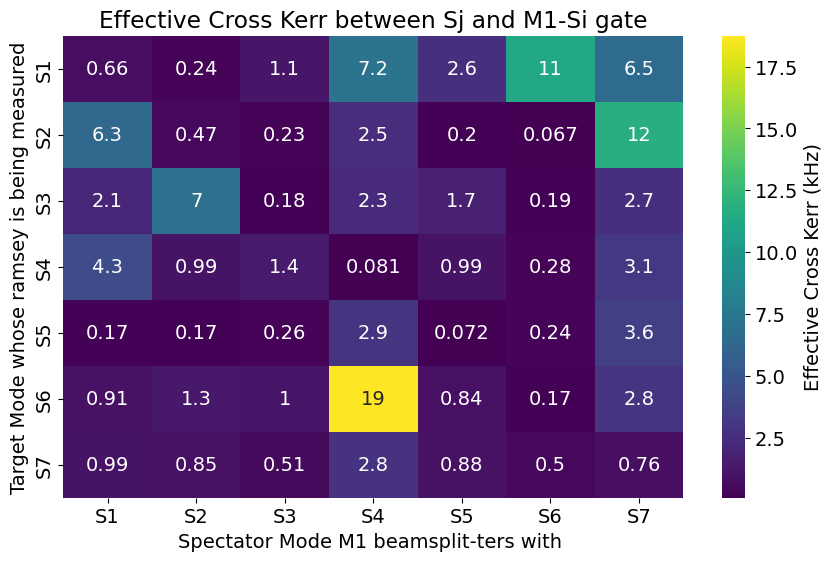

In [59]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

sns.heatmap(np.abs(np.round(ckerr_m1_si_mat *1e3, 3)), ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Effective Cross Kerr (kHz)'})
ax1.set_title('Effective Cross Kerr between Sj and M1-Si gate')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode M1 beamsplit-ters with ')
ax1.set_ylabel('Target Mode whose ramsey is being measured')


Text(90.72222222222221, 0.5, 'Target Mode whose ramsey is being measured')

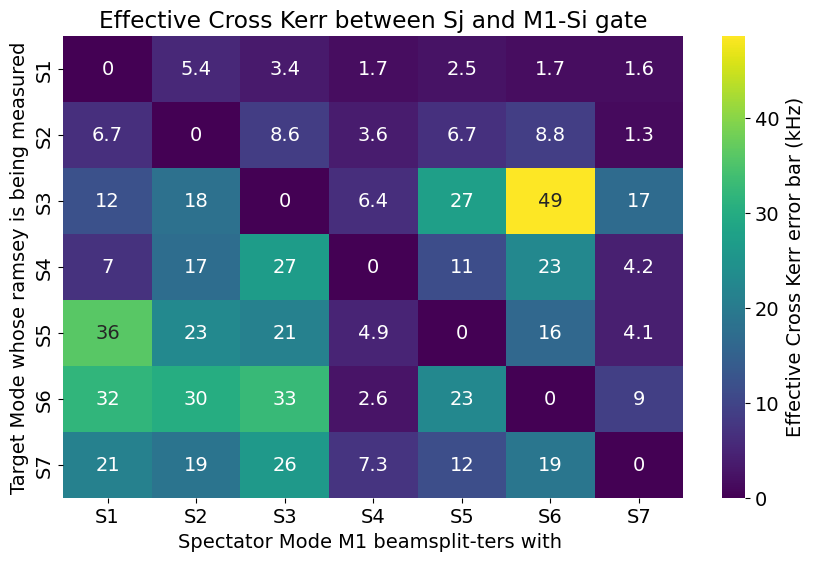

In [60]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

sns.heatmap(np.abs(np.round(ckerr_m1_si_mat_err, 3)), ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Effective Cross Kerr error bar (kHz)'})
ax1.set_title('Effective Cross Kerr between Sj and M1-Si gate')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode M1 beamsplit-ters with ')
ax1.set_ylabel('Target Mode whose ramsey is being measured')

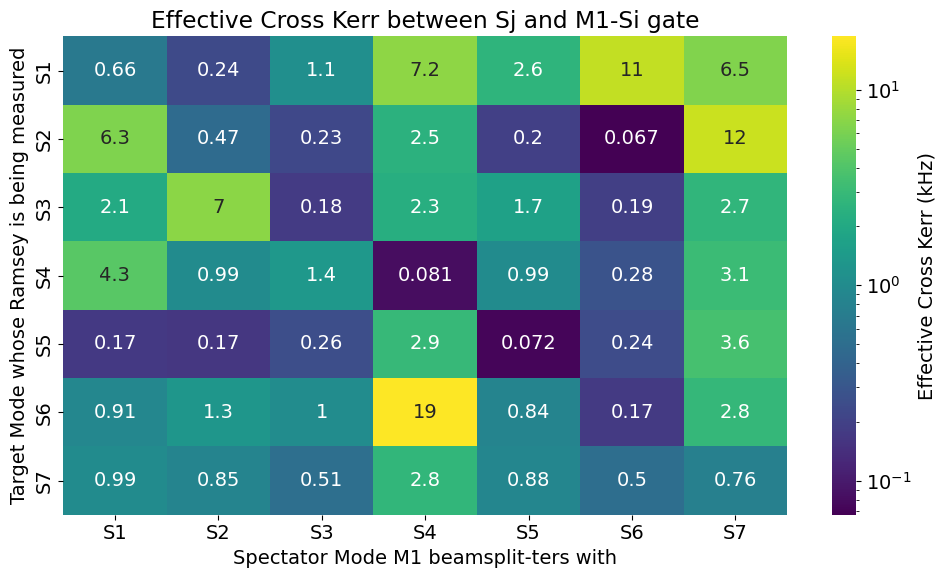

In [61]:
from matplotlib.colors import LogNorm
# Create the heatmap
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Apply logarithmic normalization
sns.heatmap(
    np.abs(np.round(ckerr_m1_si_mat * 1e3, 3)), 
    ax=ax1, 
    cmap='viridis', 
    norm=LogNorm(),  # Apply logarithmic normalization
    annot=True, 
    cbar=True, 
    cbar_kws={'label': 'Effective Cross Kerr (kHz)'}
)

# Set labels and title
ax1.set_title('Effective Cross Kerr between Sj and M1-Si gate')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode M1 beamsplit-ters with')
ax1.set_ylabel('Target Mode whose Ramsey is being measured')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [62]:
# for getting a sense of average 
ckerrs_mean = np.sum(np.abs(ckerr_m1_si_mat), axis=1)
np.average(ckerrs_mean*1e3)

16.977694346183306

In [63]:
0.016978*15

0.25467

In [64]:
idle_err_due_to_specs = []
idle_err_due_to_spec_prod = []
for target_mode in modes:
    idle_err_due_to_spec = 0 # error due to loading and unloading from Si 
    net_fidelity = 1
    for spec_mode in modes:
        print(f"target_mode: {target_mode}, spec_mode: {spec_mode}")
        if target_mode != spec_mode:
            targ_idx = int(target_mode[1]) -1
            spec_idx = int(spec_mode[1]) -1
            ckerr = np.abs(ckerr_m1_si_mat[targ_idx][spec_idx])
            m1_si_gate_time = get_gate_time(spec_mode) * 2 # 2 for loading and unloading
            f0g1_time = get_f0g1_time() * 2 # 2 for loading and unloading
            total_time = m1_si_gate_time + f0g1_time
            print ('------------------------------------')
            print('gate time:', total_time)
            fid_spec_gate = (1 -(ckerr * total_time ))
            net_fidelity*= fid_spec_gate
            idle_err_due_to_spec += ckerr * total_time
            print(ckerr * total_time)
    idle_err_due_to_specs.append(idle_err_due_to_spec)
    idle_err_due_to_spec_prod.append(1-net_fidelity)
idle_err_due_to_specs
    

target_mode: S1, spec_mode: S1
target_mode: S1, spec_mode: S2
------------------------------------
gate time: 3.4731715631850744
0.0008240265062364571
target_mode: S1, spec_mode: S3
------------------------------------
gate time: 3.879183583397534
0.004225030621597459
target_mode: S1, spec_mode: S4
------------------------------------
gate time: 3.719938508441041
0.026716443073716692
target_mode: S1, spec_mode: S5
------------------------------------
gate time: 5.1577595307699475
0.013541141902916387
target_mode: S1, spec_mode: S6
------------------------------------
gate time: 4.401983566476178
0.0495418684456171
target_mode: S1, spec_mode: S7
------------------------------------
gate time: 4.5813798389857805
0.0297624751492031
target_mode: S2, spec_mode: S1
------------------------------------
gate time: 3.165649297683249
0.019955801516706267
target_mode: S2, spec_mode: S2
target_mode: S2, spec_mode: S3
------------------------------------
gate time: 3.879183583397534
0.0008783173433

[0.1246109856992872,
 0.08558575455515877,
 0.061273679032145534,
 0.04294899433111566,
 0.030384010739141817,
 0.09843450326120629,
 0.025121739252630008]

In [65]:
idle_err_due_to_spec_prod

[0.1190878321649197,
 0.08365269534049868,
 0.0598796818481202,
 0.04226019906584677,
 0.030116719327872077,
 0.09616111212530698,
 0.02488421474691338]

In [66]:
df_master['idle_err_due_to_spec_gates'] = idle_err_due_to_spec_prod

## Many Body Dephasing

$$\epsilon_{MBD} = 1 - e^{-2 \kappa_{MBD} \sum_{i = 1}^{6} (t_{C_1 fetch} + t_{C1Si})}$$

### Idling

In [67]:
# save dataframe
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ManyBodyDephasing.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_MBD = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManyBodyDephasing.csv


In [68]:
T2s = df_MBD['t2'].values
T2_errs = df_MBD['t2_err'].values

kappas = 1/T2s
kappa_errs = T2_errs / (T2s ** 2)
kappas, kappa_errs

df_MBD['kappas'] = kappas
df_MBD['kappa_errs'] = kappa_errs

In [69]:
df_MBD

,Unnamed: 0.1,Unnamed: 0,target,state_idx,file_no,name,t2,t2_err,p,pCov,xdata,idata,return_args,kappas,kappa_errs
0,0,0,1,0,90,_stor_cavity_ramsey_sweep.h5,278.042230,10.884967,[ 3.24240150e+02 2.80972092e-02 -3.74620490e+...,[[ 1.09038088e+16 -9.54145116e+01 3.11069106e...,[ 1.81 3.61 5.41 7.21 9.01 10.81 12...,"[-132.15446674537586, -81.4926948051948, -25.3...",NaN,0.003597,0.000141
1,1,1,1,1,22,_stor_cavity_ramsey_sweep.h5,290.866341,13.154786,[ 3.17205254e+02 2.81728391e-02 -4.34467770e+...,[[ 1.15052670e+16 8.32883738e+01 -2.68473223e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-134.0004214852085, -86.87475864257942, -30.3...",NaN,0.003438,0.000155
2,2,2,1,2,23,_stor_cavity_ramsey_sweep.h5,260.005531,9.453510,"[352.61802854947564, 0.02252252252252253, -53....",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-128.49311135112353, -95.4091829223408, -55.4...",NaN,0.003846,0.000140
3,3,3,1,3,24,_stor_cavity_ramsey_sweep.h5,285.860033,12.445693,[ 2.98245751e+02 2.77988125e-02 -4.43351771e+...,[[ 1.34342862e+16 -1.15520991e+02 1.90671907e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-137.93075129738415, -83.48585016593066, -20....",NaN,0.003498,0.000152
4,4,4,1,4,25,_stor_cavity_ramsey_sweep.h5,253.318176,10.196474,"[382.4504166493798, 0.02252252252252253, 59.50...",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-142.45235487404165, -111.91995732462264, -26...",NaN,0.003948,0.000159
5,5,5,1,5,26,_stor_cavity_ramsey_sweep.h5,281.408727,11.610525,[ 2.93444476e+02 2.78841355e-02 -4.88712750e+...,[[ 7.76562395e+15 1.47040584e+02 -5.77985856e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-141.12335001064508, -85.12480121918897, -27....",NaN,0.003554,0.000147
6,6,6,2,0,92,_stor_cavity_ramsey_sweep.h5,435.249214,17.516631,[ 3.37600375e+02 9.27565314e-03 1.35714631e+...,[[ 1.49710288e+16 -8.38181627e+01 8.60808244e...,[ 6.01 12.01 18.01 24.01 30.01 36.01 42...,"[3.4405705856010123, -45.609278879015726, -131...",NaN,0.002298,0.000092
7,7,7,2,1,30,_stor_cavity_ramsey_sweep.h5,480.860541,14.388364,[ 3.43782520e+02 9.30490906e-03 1.30964766e+...,[[ 3.47693459e+01 5.33715223e-07 -3.62759335e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[76.7657297339757, 34.58518767817549, -42.9902...",NaN,0.002080,0.000062
8,8,8,2,2,31,_stor_cavity_ramsey_sweep.h5,467.648602,21.497076,[ 2.77361608e+02 9.02182481e-03 1.19233027e+...,[[ 5.98011256e+01 -4.42052116e-06 4.37817552e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[79.25604201524446, 61.97823619469962, -19.346...",NaN,0.002138,0.000098
9,9,9,2,3,32,_stor_cavity_ramsey_sweep.h5,479.399206,17.607957,[ 3.12239323e+02 9.14896655e-03 1.28147621e+...,[[ 4.68575825e+01 -2.81721708e-07 3.75306936e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[96.05281077948422, 43.75738619832307, -27.001...",NaN,0.002086,0.000077


Storage 1: 0.51 +/- 0.20 kHz
Time: 1.96 +/- 4.92 ms
Storage 2: 0.23 +/- 0.13 kHz
Time: 4.30 +/- 7.88 ms
Storage 3: 0.15 +/- 0.07 kHz
Time: 6.46 +/- 14.95 ms
Storage 4: 0.13 +/- 0.08 kHz
Time: 7.69 +/- 12.63 ms
Storage 5: 0.16 +/- 0.10 kHz
Time: 6.18 +/- 10.39 ms
Storage 6: 0.15 +/- 0.08 kHz
Time: 6.81 +/- 12.09 ms
Storage 7: 0.23 +/- 0.10 kHz
Time: 4.39 +/- 10.16 ms


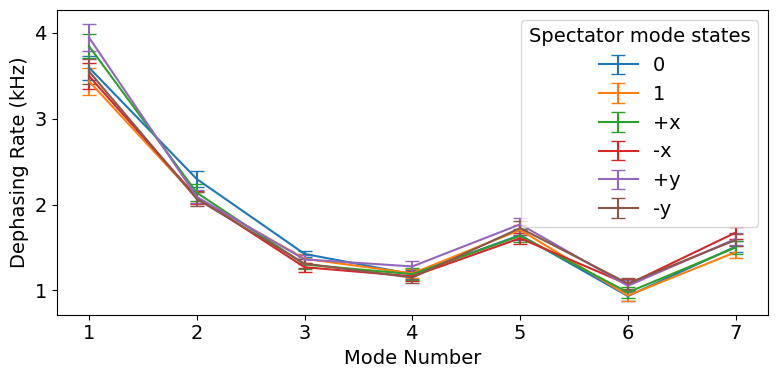

In [70]:
mode_list = [1, 2, 3, 4, 5, 6, 7]
kappas_all = []
kappas_err_all = []
fig = plt.figure(figsize=(8,4))
del_kappas =[]

for mode_no in mode_list:
    df_target = df_MBD[df_MBD['target'] == mode_no]
    kappas = df_target['kappas'].values
    kappa_errs = df_target['kappa_errs'].values

    kappas_all.append(kappas )#- kappas[0])
    kappas_err_all.append(np.sqrt(np.square(kappa_errs) ))#+ np.square(kappa_errs[0])) )

    # print max deviation with error
    del_kappa = abs(min(kappas) - max(kappas)) *1e3
    del_kappas.append(del_kappa *1e-3)
    del_kappa_err = np.sqrt(np.square(kappa_errs[0]) + np.square(kappa_errs[-1])) * 1e3
    # print kappa with err as well as associated time
    print(f'Storage {mode_no}: {del_kappa:.2f} +/- {del_kappa_err:.2f} kHz')
    print(f'Time: {1/del_kappa:.2f} +/- {1/del_kappa_err:.2f} ms')
    

state_labels = ['0', '1', '+x', '-x', '+y', '-y']
kappas_t = np.array(kappas_all).T * 1e3
kappa_errs_t = np.array(kappas_err_all).T * 1e3
# del_kappas = []

for state_idx in range(6):
    plt.errorbar(mode_list, kappas_t[state_idx], yerr=kappa_errs_t[state_idx], label=state_labels[state_idx], capsize=5)
    del_kappa = abs(min(kappas_t[state_idx]) - max(kappas_t[state_idx]))
    # del_kappas.append(del_kappa)
    #print(f'State {state_labels[state_idx]}: {del_kappa:.2f} kHz')

plt.xlabel('Mode Number')
plt.ylabel('Dephasing Rate (kHz)')
plt.legend(title ='Spectator mode states')
# plt.yscale('log')
plt.tight_layout()
plt.show()

In [71]:
np.average(np.array(del_kappas) * 1e3)

0.22333545716600023

In [72]:
for mode_idx in range(7):
    # print mean and standard deviation
    print(f"Mode {mode_idx + 1}: {np.mean(kappas_all[mode_idx]*1e3):.3f} +/- {np.std(kappas_all[mode_idx] * 1e3):.3f} kHz")

    # calculate error on standard deviation


Mode 1: 3.647 +/- 0.186 kHz
Mode 2: 2.126 +/- 0.080 kHz
Mode 3: 1.340 +/- 0.051 kHz
Mode 4: 1.194 +/- 0.041 kHz
Mode 5: 1.681 +/- 0.057 kHz
Mode 6: 1.009 +/- 0.061 kHz
Mode 7: 1.553 +/- 0.075 kHz


In [73]:
del_kappa

2.473520658971921

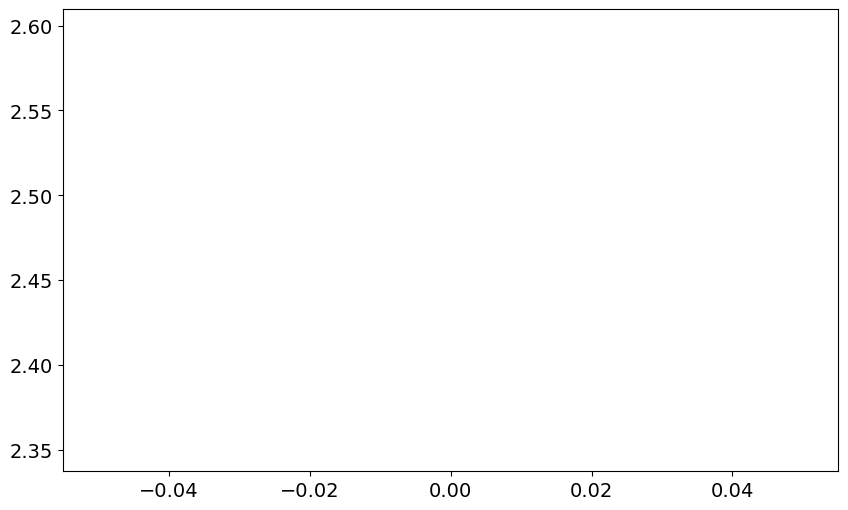

In [74]:
plt.plot(del_kappa)

In [75]:
np.array(kappas_all)

array([[0.00359658, 0.00343801, 0.00384607, 0.00349822, 0.0039476 ,
        0.00355355],
       [0.00229753, 0.00207961, 0.00213836, 0.00208594, 0.00209031,
        0.00206516],
       [0.0014246 , 0.00136893, 0.00130188, 0.00126977, 0.00136052,
        0.00131197],
       [0.00118816, 0.0011977 , 0.00118827, 0.00116336, 0.00127875,
        0.00114869],
       [0.00164346, 0.00170487, 0.00163574, 0.0016072 , 0.00176902,
        0.00172611],
       [0.00093321, 0.00093969, 0.00097669, 0.00106942, 0.00105351,
        0.00108003],
       [0.00150996, 0.00144572, 0.0014999 , 0.00167356, 0.00160022,
        0.0015868 ]])

In [76]:
np.array(kappas_err_all)

array([[1.40800947e-04, 1.55487994e-04, 1.39838867e-04, 1.52304317e-04,
        1.58897591e-04, 1.46614433e-04],
       [9.24644090e-05, 6.22261794e-05, 9.82969646e-05, 7.66150973e-05,
        7.77550268e-05, 8.68286870e-05],
       [3.74536515e-05, 5.38670718e-05, 5.85868358e-05, 5.49199296e-05,
        5.27603745e-05, 5.53943623e-05],
       [5.07937190e-05, 4.94207920e-05, 7.14569008e-05, 5.90957505e-05,
        6.55317532e-05, 6.07182822e-05],
       [5.66953681e-05, 6.22353916e-05, 7.63160025e-05, 6.57978934e-05,
        7.38857179e-05, 7.77656084e-05],
       [5.50279789e-05, 6.22679218e-05, 6.67758040e-05, 6.26248921e-05,
        6.79471375e-05, 6.17288286e-05],
       [6.56360355e-05, 6.62632976e-05, 8.09301416e-05, 7.02363436e-05,
        6.99985659e-05, 7.34072649e-05]])

In [77]:
# teh deviation from the blue curve is the MBD depahsing error 
MBD_idle_errs = []
for idx, mode in enumerate(modes):
    f0g1_idle_time = df_master[df_master['Mode'] == mode]['f0g1_other_spec_targ_idle'].values[0] # 1 way for all 6 spectators 
    M1_Si_idle_time = df_master[df_master['Mode'] == mode]['M1_Si_other_spec_targ_idle'].values[0] # 1 way for all 6 spectators 
    MBD_idle_err =  1- np.exp(-1 * del_kappas[idx] * (f0g1_idle_time + M1_Si_idle_time) * 2)
    MBD_idle_errs.append(MBD_idle_err)
df_master['MBD_idle_err'] = MBD_idle_errs

In [78]:
df_master.keys

<bound method NDFrame.keys of   Mode  gate_time  f0g1_other_spec_targ_idle  M1_Si_other_spec_targ_idle  \
0   S1   0.977143                   4.894091                    8.972618   
1   S2   1.130904                   4.894091                    8.818856   
2   S3   1.333910                   4.894091                    8.615850   
3   S4   1.254287                   4.894091                    8.695473   
4   S5   1.973198                   4.894091                    7.976562   
5   S6   1.595310                   4.894091                    8.354450   
6   S7   1.685008                   4.894091                    8.264752   

   kappa_t1s (MHz)  kappa_T2 (MHz)  kappa_T2_echo (MHz)  idle:decay_err  \
0         0.002791        0.004243             0.001813        0.074483   
1         0.000797        0.002643             0.000670        0.021620   
2         0.001252        0.001477             0.000763        0.033252   
3         0.001674        0.001240             0.001028      

In [79]:
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),kappa_T2_echo (MHz),idle:decay_err,idle:dephasing_err,idle_err_due_to_spec_gates,MBD_idle_err
0,S1,0.977143,4.894091,8.972618,0.002791,0.004243,0.001813,0.074483,0.011513,0.119088,0.014034
1,S2,1.130904,4.894091,8.818856,0.000797,0.002643,0.000670,0.021620,0.007411,0.083653,0.006353
2,S3,1.333910,4.894091,8.615850,0.001252,0.001477,0.000763,0.033252,0.003712,0.059880,0.004175
3,S4,1.254287,4.894091,8.695473,0.001674,0.001240,0.001028,0.044476,0.005190,0.042260,0.003529
4,S5,1.973198,4.894091,7.976562,0.002811,0.001690,0.001508,0.069811,0.002618,0.030117,0.004157
5,S6,1.595310,4.894091,8.354450,0.001696,0.000934,0.000954,0.043953,0.002797,0.096161,0.003883
6,S7,1.685008,4.894091,8.264752,0.002694,0.001507,0.001444,0.068444,0.002542,0.024884,0.005978


## State Dependent Access Error 
Dual Rail RB in presence of spectators   

$$\epsilon_{SDA} =  1 - (1-\sum_{j = 1; j\neq i}^{7}(1-(1-\epsilon_{ij})^{3/2}))^{1/7}$$
STate dependent access
This is for a single fetch

*** THIS IS USING SEMICLASSICAL ANALYSIS ***


In [80]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'StateDependentAccessError.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)
df_rb_spec = pd.read_csv(file_path)
df_rb_spec.iloc[0]['eps']

0.0

In [81]:
# convert df_rb_spec into a matrix
rb_spec_mat = np.zeros((7,7))
rb_spec_mat_err = np.zeros((7,7))
for i, row in df_rb_spec.iterrows():
    target = int(row['target_mode'])
    spec = int(row['spectator_mode'])
    rb_spec_mat[target -1][spec -1] =  row['eps']
    rb_spec_mat_err[target -1][spec -1] = row['eps_err']




In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmaps(eps_list, eps_err_list, target_modes, spectator_modes):
    """
    Plot heatmaps for eps values and their errors.

    Parameters:
    eps_list (list of list of float): The eps values for each target and spectator mode.
    eps_err_list (list of list of float): The eps error values for each target and spectator mode.
    target_modes (list of str): The labels for the target modes.
    spectator_modes (list of str): The labels for the spectator modes.
    """
    # Convert lists to numpy arrays
    eps_array = np.array(eps_list) * 1e2
    eps_err_array = np.array(eps_err_list) * 1e2

    # Create the heatmaps
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    sns.heatmap(eps_array.T, ax=ax1, cmap='viridis', annot=True, cbar=True,
                cbar_kws={'label': 'InFidelity (%)'})
    # ax1.set_title('InFidelity of RB with spectators')
    ax1.set_xticklabels(target_modes)
    ax1.set_yticklabels(spectator_modes)
    ax1.set_ylabel('Spectator Mode')

    sns.heatmap(eps_err_array.T, ax=ax2, cmap='viridis', annot=True, cbar=True,
                cbar_kws={'label': 'Fidelity Error'})
    # ax2.set_title('InFidelity Error of RB with spectators (%)')
    ax2.set_xticklabels(target_modes)
    ax2.set_yticklabels(spectator_modes)
    ax2.set_ylabel('Spectator Mode')

    plt.tight_layout()
    plt.show()


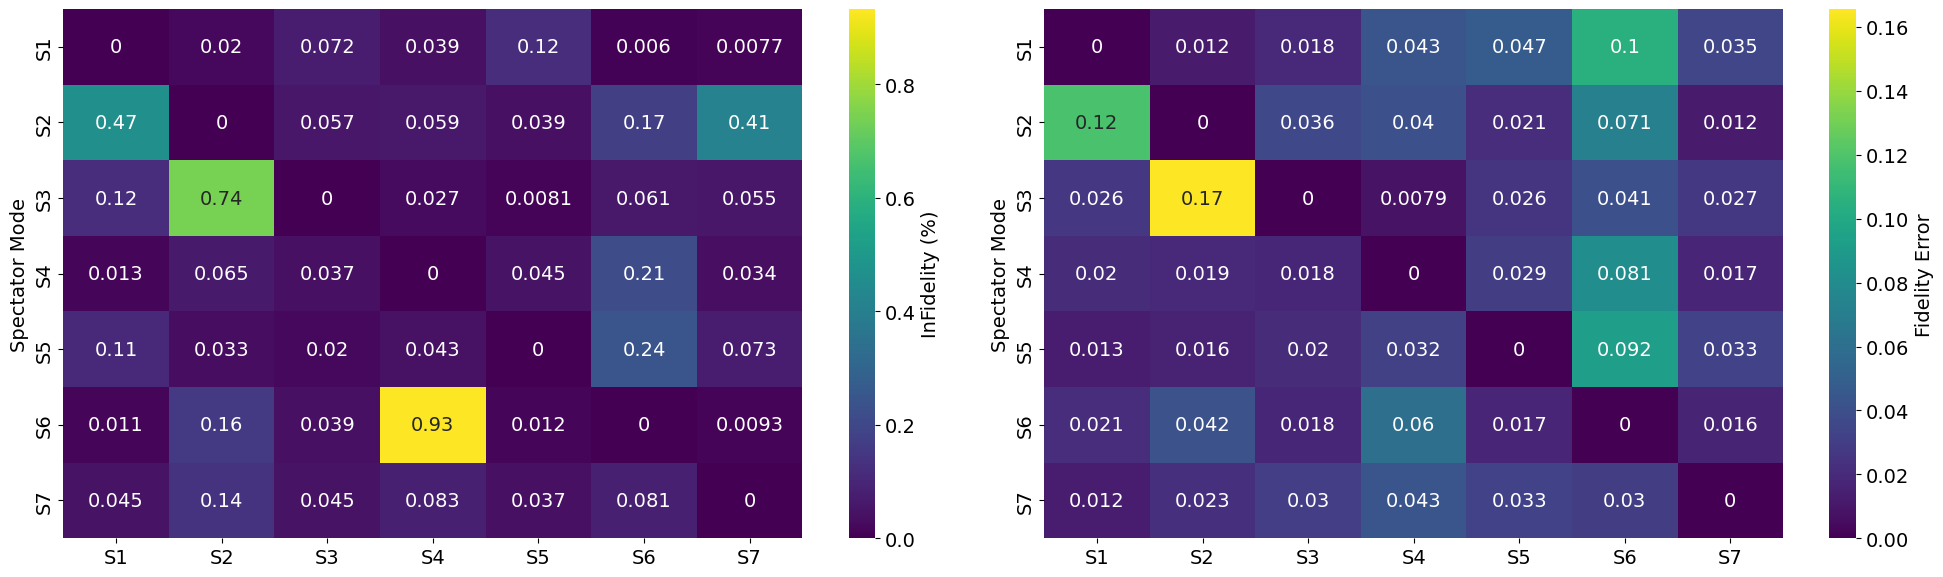

In [83]:
infidelities_due_to_spec = rb_spec_mat
infidelities_due_to_spec_err = rb_spec_mat_err
infidelities_due_to_spec = np.abs(np.array(infidelities_due_to_spec))#*1e3
infidelities_due_to_spec_err = np.array(infidelities_due_to_spec_err)#*1e3
tick_labels = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']

plot_heatmaps(infidelities_due_to_spec, infidelities_due_to_spec_err, tick_labels, tick_labels)

#### Convert to SWAP errors

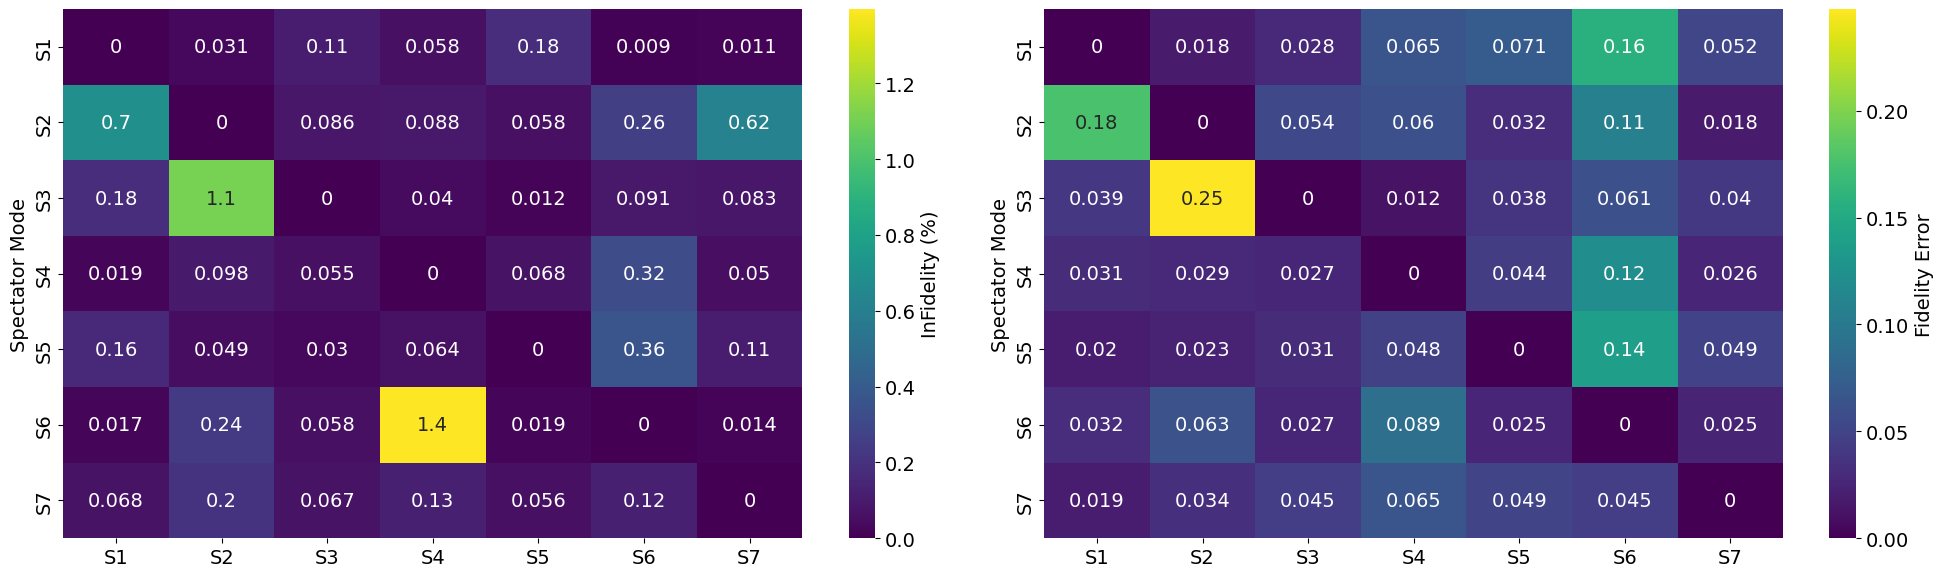

In [84]:
infidelities_swap = 1- (1-infidelities_due_to_spec ) **(3/2)
infidelities_swap_err = (3/2) * (1-infidelities_due_to_spec ) **(1/2) * infidelities_due_to_spec_err

plot_heatmaps(infidelities_swap, infidelities_swap_err, tick_labels, tick_labels)

In [85]:
infidelities_swap

array([[0.00000000e+00, 6.97328336e-03, 1.77639707e-03, 1.90830946e-04,
        1.61742286e-03, 1.65851803e-04, 6.78160219e-04],
       [3.07171586e-04, 0.00000000e+00, 1.11099725e-02, 9.78769485e-04,
        4.89329184e-04, 2.36296740e-03, 2.04860510e-03],
       [1.07654273e-03, 8.60534216e-04, 0.00000000e+00, 5.47552505e-04,
        3.03043591e-04, 5.78921358e-04, 6.73767920e-04],
       [5.84340979e-04, 8.77684152e-04, 3.99928802e-04, 0.00000000e+00,
        6.44689192e-04, 1.39563376e-02, 1.25001035e-03],
       [1.79368604e-03, 5.78644886e-04, 1.22076503e-04, 6.80549024e-04,
        0.00000000e+00, 1.87230933e-04, 5.59546033e-04],
       [9.04093887e-05, 2.57090694e-03, 9.09465256e-04, 3.20877137e-03,
        3.60755848e-03, 0.00000000e+00, 1.21849580e-03],
       [1.14823597e-04, 6.17583768e-03, 8.25844564e-04, 5.03967806e-04,
        1.09501048e-03, 1.40050654e-04, 0.00000000e+00]])

#### Save swap errors

In [86]:
# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['target_mode', 'spectator_mode', 'eps', 'eps_err'])

eps_ar = infidelities_swap
eps_err_ar = infidelities_swap_err

target_modes = [1, 2, 3, 4, 5, 6, 7]
spectator_modes = [1, 2, 3, 4, 5, 6, 7]

# Loop through each combination of target and spectator modes
for target_mode in target_modes:
    for spectator_mode in spectator_modes:
        print(f"Target Mode: {target_mode}, Spectator Mode: {spectator_mode}")
        results_df = results_df.append({
            'target_mode': target_mode,
            'spectator_mode': spectator_mode,
            'eps': eps_ar[target_mode-1][spectator_mode-1],
            'eps_err': eps_err_ar[target_mode-1][spectator_mode-1]
        }, ignore_index=True)

# Print the results DataFrame
print(results_df)

Target Mode: 1, Spectator Mode: 1
Target Mode: 1, Spectator Mode: 2
Target Mode: 1, Spectator Mode: 3
Target Mode: 1, Spectator Mode: 4
Target Mode: 1, Spectator Mode: 5
Target Mode: 1, Spectator Mode: 6
Target Mode: 1, Spectator Mode: 7
Target Mode: 2, Spectator Mode: 1
Target Mode: 2, Spectator Mode: 2
Target Mode: 2, Spectator Mode: 3
Target Mode: 2, Spectator Mode: 4
Target Mode: 2, Spectator Mode: 5
Target Mode: 2, Spectator Mode: 6
Target Mode: 2, Spectator Mode: 7
Target Mode: 3, Spectator Mode: 1
Target Mode: 3, Spectator Mode: 2
Target Mode: 3, Spectator Mode: 3
Target Mode: 3, Spectator Mode: 4
Target Mode: 3, Spectator Mode: 5
Target Mode: 3, Spectator Mode: 6
Target Mode: 3, Spectator Mode: 7
Target Mode: 4, Spectator Mode: 1
Target Mode: 4, Spectator Mode: 2
Target Mode: 4, Spectator Mode: 3
Target Mode: 4, Spectator Mode: 4
Target Mode: 4, Spectator Mode: 5
Target Mode: 4, Spectator Mode: 6
Target Mode: 4, Spectator Mode: 7
Target Mode: 5, Spectator Mode: 1
Target Mode: 5

C:\Users\26049\AppData\Local\Temp\ipykernel_7216\1152257565.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\26049\AppData\Local\Temp\ipykernel_7216\1152257565.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\26049\AppData\Local\Temp\ipykernel_7216\1152257565.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\26049\AppData\Local\Temp\ipykernel_7216\1152257565.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\26049\AppData\Local\Temp\ipykernel_7216\1152257565.

In [87]:
results_df

,target_mode,spectator_mode,eps,eps_err
0,1.0,1.0,0.000000,0.000000
1,1.0,2.0,0.006973,0.001763
2,1.0,3.0,0.001776,0.000391
3,1.0,4.0,0.000191,0.000306
4,1.0,5.0,0.001617,0.000199
5,1.0,6.0,0.000166,0.000317
6,1.0,7.0,0.000678,0.000187
7,2.0,1.0,0.000307,0.000181
8,2.0,2.0,0.000000,0.000000
9,2.0,3.0,0.011110,0.002475


In [177]:
# save the dataframe 
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'StateDependentAccessError_swap.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
results_df.to_csv(file_path, index=False)
print('File saved to', file_path)

File saved to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\StateDependentAccessError_swap.csv


In [88]:
infidelities_swap

array([[0.00000000e+00, 6.97328336e-03, 1.77639707e-03, 1.90830946e-04,
        1.61742286e-03, 1.65851803e-04, 6.78160219e-04],
       [3.07171586e-04, 0.00000000e+00, 1.11099725e-02, 9.78769485e-04,
        4.89329184e-04, 2.36296740e-03, 2.04860510e-03],
       [1.07654273e-03, 8.60534216e-04, 0.00000000e+00, 5.47552505e-04,
        3.03043591e-04, 5.78921358e-04, 6.73767920e-04],
       [5.84340979e-04, 8.77684152e-04, 3.99928802e-04, 0.00000000e+00,
        6.44689192e-04, 1.39563376e-02, 1.25001035e-03],
       [1.79368604e-03, 5.78644886e-04, 1.22076503e-04, 6.80549024e-04,
        0.00000000e+00, 1.87230933e-04, 5.59546033e-04],
       [9.04093887e-05, 2.57090694e-03, 9.09465256e-04, 3.20877137e-03,
        3.60755848e-03, 0.00000000e+00, 1.21849580e-03],
       [1.14823597e-04, 6.17583768e-03, 8.25844564e-04, 5.03967806e-04,
        1.09501048e-03, 1.40050654e-04, 0.00000000e+00]])

In [89]:
infidelities_swap_err

array([[0.        , 0.0017625 , 0.0003912 , 0.0003055 , 0.00019891,
        0.00031722, 0.00018739],
       [0.00018078, 0.        , 0.00247523, 0.00028809, 0.00023339,
        0.00062637, 0.00034397],
       [0.00027629, 0.00054013, 0.        , 0.00026699, 0.0003067 ,
        0.0002663 , 0.00044669],
       [0.00064522, 0.00060242, 0.00011886, 0.        , 0.0004766 ,
        0.00088997, 0.00064881],
       [0.00071101, 0.00031734, 0.00038251, 0.00043691, 0.        ,
        0.00025265, 0.00049386],
       [0.00157379, 0.00106855, 0.00060873, 0.00121658, 0.00137899,
        0.        , 0.00044618],
       [0.00052205, 0.00017761, 0.00040087, 0.00025609, 0.00049246,
        0.00024652, 0.        ]])

In [90]:
# Put inside df_master 
approx_gate_mbd_errs = []
for i in range(7):
    approx_gate_mbd_errs.append(np.sum(infidelities_swap[i]))
df_master['gate_mbd_err'] = approx_gate_mbd_errs
approx_gate_mbd_errs

[0.01140194626049118,
 0.017296815291623968,
 0.00404036231708893,
 0.017712991106489162,
 0.003921733415045647,
 0.011605607238444282,
 0.008855534783589247]

In [91]:
np.mean(approx_gate_mbd_errs)

0.010690712916110345

In [92]:
#contribution to random read fidelity 
for i in range(7):
    print(f"Mode {i+1}: {1-(1-approx_gate_mbd_errs[i])**(1/7):.5f}")

Mode 1: 0.00164
Mode 2: 0.00249
Mode 3: 0.00058
Mode 4: 0.00255
Mode 5: 0.00056
Mode 6: 0.00167
Mode 7: 0.00127


In [27]:
# bare swap gate infidelity 
df_bs

NameError: name 'df_bs' is not defined

### OLD (DEPRECATED): Gate
Dual Rail RB in presence of spectators   

$$\epsilon_{SDA} =  1 - (1-\sum_{j = 1; j\neq i}^{7}\epsilon_{ij})^{3/2}$$
STate dependent access
This is for a single fetch

In [159]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters_withSingleSpec.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)
df_rb_spec = pd.read_csv(file_path)
df_rb_spec.keys()

Index(['target', 'spectator', 'file_list', 'name', 'fids_list',
       'fids_post_list', 'depth_list', 'p_survival', 'p_survival_err'],
      dtype='object')

In [160]:
df_rb_spec

,target,spectator,file_list,name,fids_list,fids_post_list,depth_list,p_survival,p_survival_err
0,1,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.910093526571017, 0.8954892874542445, 0.8512...","[0.9799832506787038, 0.9710116812063394, 0.933...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996843,0.000271
1,1,3,"[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9222854589478902, 0.909096866749857, 0.8911...","[0.992736101084076, 0.9909399088476863, 0.9901...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996488,0.000067
2,1,4,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9276039967171705, 0.9150756288711042, 0.900...","[0.99271075837015, 0.9913995181913406, 0.98861...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996772,0.000108
3,1,5,"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9352654272919326, 0.9244829715535151, 0.908...","[0.9928800543427093, 0.9921072905953487, 0.990...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996743,0.000092
4,1,6,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9204824035487779, 0.9138329812855798, 0.900...","[0.9880122050514494, 0.9885650752859831, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996872,0.000132
5,1,7,"[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9327589684002223, 0.9215107080122759, 0.908...","[0.9927216181251227, 0.9921485442521224, 0.991...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996782,0.000067
6,2,1,"[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9278776650426049, 0.925440975814047, 0.9167...","[0.9916436964152529, 0.9907233329806933, 0.989...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997563,0.000038
7,2,3,"[98, 99, 100, 101, 102, 103, 104, 105, 106, 10...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9057421088234281, 0.8822340900901485, 0.847...","[0.9735317841050743, 0.9574914777165434, 0.925...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997336,0.000395
8,2,4,"[112, 113, 114, 115, 116, 117, 118, 119, 120, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9298086718474624, 0.9211016305086126, 0.911...","[0.9901146062096049, 0.9895436204484327, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997454,0.000053
9,2,5,"[126, 127, 128, 129, 130, 131, 132, 133, 134, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9336954152085782, 0.9296354107338302, 0.918...","[0.9912287415956634, 0.990662039611712, 0.9893...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997464,0.000059


#### Fit exponential to  first 100 gates and get the decay rate

In [161]:
import ast

In [162]:
def fit_exp(xpts, ypts, fit_params = [None, None, None, None]):
    '''fit exponential decay'''
    p, pCov = fitter.fitexp(xpts, ypts, fitparams=fit_params)
    # plot the fit
    fig = plt.figure(figsize=(8,4))
    plt.plot(xpts, fitter.expfunc(xpts, *p), label=f'$t$ fit [gates]: {p[3]:.3} $\pm$ {np.sqrt(pCov[3][3]):.3}')
    plt.plot(xpts, ypts, 'o', label='data')
    plt.legend()
    return p, pCov

In [163]:
def fit_all_pairs(df, start_idx = 0, end_idx = 8, if_print = True):
    '''fit all pairs of data'''
    gate_errs = []
    gate_err_errs = []
    for idx, row in df.iterrows():
        fids_list = ast.literal_eval(row['fids_list'])
        depth_list = ast.literal_eval(row['depth_list'])
        p, pCov = fit_exp(np.array(depth_list)[start_idx: end_idx], np.array(fids_list)[start_idx: end_idx])
        gate_err = np.exp(-1 / p[3])
        gate_err_err = np.exp(-1 / p[3]) * np.sqrt(np.diag(pCov))[3] / p[3]/p[3]
        if if_print:
            print(f"target: {row['target']}, 'spectator': {row['spectator']}, gate_err: {gate_err:.3f} +/- {gate_err_err:.3f}")
            print('------------------------------------')
        print(f"gate_err: {gate_err:.3f} +/- {gate_err_err:.3f}")
        print('------------------------------------')
        gate_errs.append(gate_err)
        gate_err_errs.append(gate_err_err)
    return gate_errs, gate_err_errs



gate_err: 0.986 +/- 0.008
------------------------------------


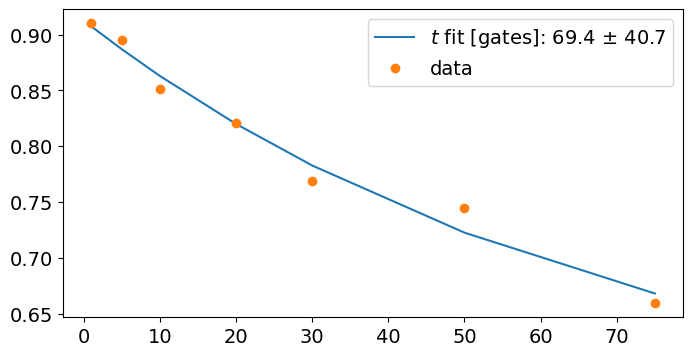

In [204]:
row = df_rb_spec.iloc[0]
start_idx = None 
end_idx = 7
fids_list = ast.literal_eval(row['fids_list'])
depth_list = ast.literal_eval(row['depth_list'])
p, pCov = fit_exp(np.array(depth_list)[start_idx: end_idx], np.array(fids_list)[start_idx: end_idx])
gate_err = np.exp(-1 / p[3])
gate_err_err = np.exp(-1 / p[3]) * np.sqrt(np.diag(pCov))[3] / p[3]/p[3]
# if if_print:
#     print(f"target: {row['target']}, 'spectator': {row['spectator']}, gate_err: {gate_err:.3f} +/- {gate_err_err:.3f}")
#     print('------------------------------------')
print(f"gate_err: {gate_err:.3f} +/- {gate_err_err:.3f}")
print('------------------------------------')
# gate_errs.append(gate_err)
# gate_err_errs.append(gate_err_err)

In [206]:
0.998**70

0.8692363712639156

target: 1, 'spectator': 2, gate_err: 0.986 +/- 0.008
------------------------------------
gate_err: 0.986 +/- 0.008
------------------------------------
target: 1, 'spectator': 3, gate_err: 0.997 +/- 0.001
------------------------------------
gate_err: 0.997 +/- 0.001
------------------------------------
target: 1, 'spectator': 4, gate_err: 0.997 +/- 0.003
------------------------------------
gate_err: 0.997 +/- 0.003
------------------------------------
target: 1, 'spectator': 5, gate_err: 0.998 +/- 0.001
------------------------------------
gate_err: 0.998 +/- 0.001
------------------------------------
target: 1, 'spectator': 6, gate_err: 0.997 +/- 0.004
------------------------------------
gate_err: 0.997 +/- 0.004
------------------------------------
target: 1, 'spectator': 7, gate_err: 0.994 +/- 0.002
------------------------------------
gate_err: 0.994 +/- 0.002
------------------------------------
target: 2, 'spectator': 1, gate_err: 0.999 +/- 0.003
-----------------------------

C:\Users\26049\AppData\Local\Temp\ipykernel_11148\1671005072.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,4))


target: 7, 'spectator': 2, gate_err: 0.990 +/- 0.001
------------------------------------
gate_err: 0.990 +/- 0.001
------------------------------------
target: 7, 'spectator': 3, gate_err: 0.995 +/- 0.002
------------------------------------
gate_err: 0.995 +/- 0.002
------------------------------------
target: 7, 'spectator': 4, gate_err: 0.993 +/- 0.001
------------------------------------
gate_err: 0.993 +/- 0.001
------------------------------------
target: 7, 'spectator': 5, gate_err: 0.996 +/- 0.001
------------------------------------
gate_err: 0.996 +/- 0.001
------------------------------------
target: 7, 'spectator': 6, gate_err: 0.993 +/- 0.001
------------------------------------
gate_err: 0.993 +/- 0.001
------------------------------------


,target,spectator,file_list,name,fids_list,fids_post_list,depth_list,p_survival,p_survival_err,fids_upto_100_depth,fids_upto_100_depth_err
0,1,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.910093526571017, 0.8954892874542445, 0.8512...","[0.9799832506787038, 0.9710116812063394, 0.933...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996843,0.000271,0.985703,0.008309
1,1,3,"[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9222854589478902, 0.909096866749857, 0.8911...","[0.992736101084076, 0.9909399088476863, 0.9901...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996488,0.000067,0.996532,0.000899
2,1,4,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9276039967171705, 0.9150756288711042, 0.900...","[0.99271075837015, 0.9913995181913406, 0.98861...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996772,0.000108,0.996882,0.002683
3,1,5,"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9352654272919326, 0.9244829715535151, 0.908...","[0.9928800543427093, 0.9921072905953487, 0.990...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996743,0.000092,0.997959,0.001443
4,1,6,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9204824035487779, 0.9138329812855798, 0.900...","[0.9880122050514494, 0.9885650752859831, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996872,0.000132,0.996636,0.003844
5,1,7,"[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9327589684002223, 0.9215107080122759, 0.908...","[0.9927216181251227, 0.9921485442521224, 0.991...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.996782,0.000067,0.993954,0.002389
6,2,1,"[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9278776650426049, 0.925440975814047, 0.9167...","[0.9916436964152529, 0.9907233329806933, 0.989...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997563,0.000038,0.999485,0.003057
7,2,3,"[98, 99, 100, 101, 102, 103, 104, 105, 106, 10...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9057421088234281, 0.8822340900901485, 0.847...","[0.9735317841050743, 0.9574914777165434, 0.925...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997336,0.000395,0.984283,0.012672
8,2,4,"[112, 113, 114, 115, 116, 117, 118, 119, 120, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9298086718474624, 0.9211016305086126, 0.911...","[0.9901146062096049, 0.9895436204484327, 0.987...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997454,0.000053,0.996541,0.003411
9,2,5,"[126, 127, 128, 129, 130, 131, 132, 133, 134, ...",_DualRail_sweep_depth_and_single_spec_and_stor.h5,"[0.9336954152085782, 0.9296354107338302, 0.918...","[0.9912287415956634, 0.990662039611712, 0.9893...","[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...",0.997464,0.000059,0.996022,0.003293


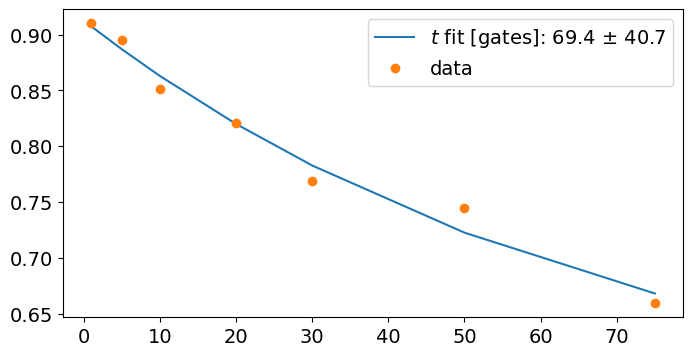

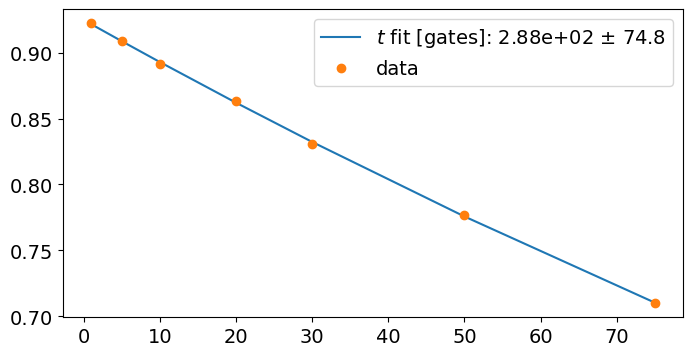

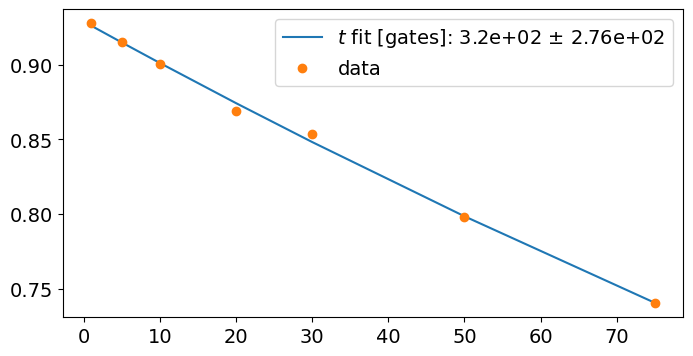

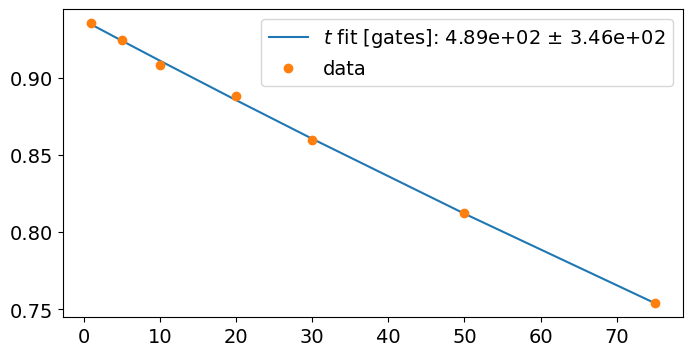

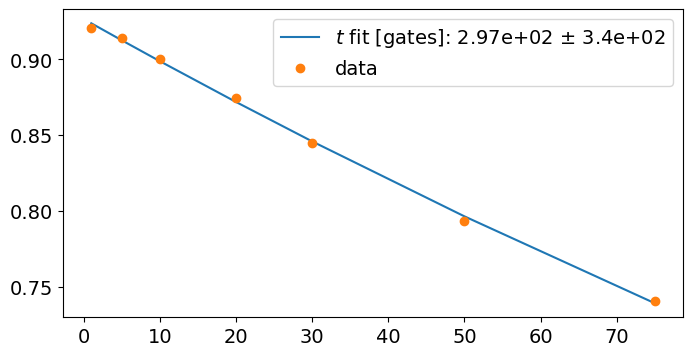

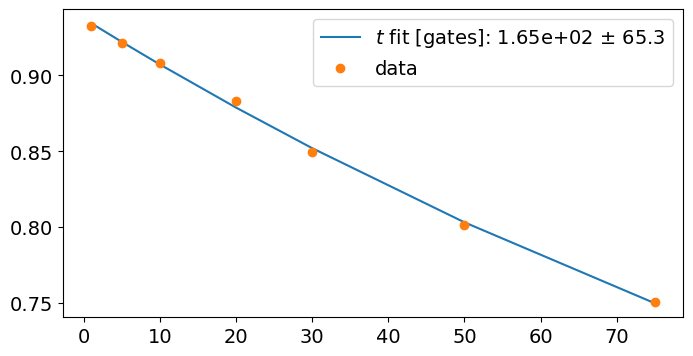

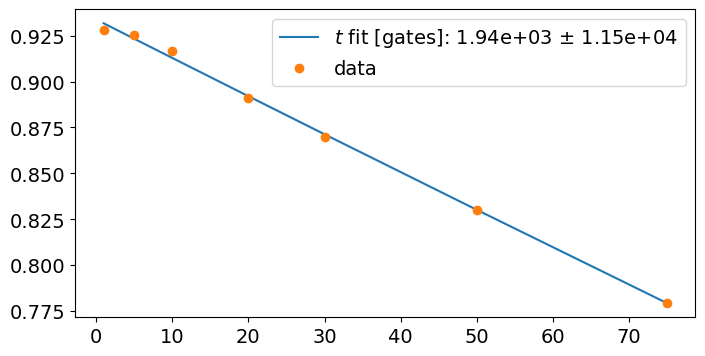

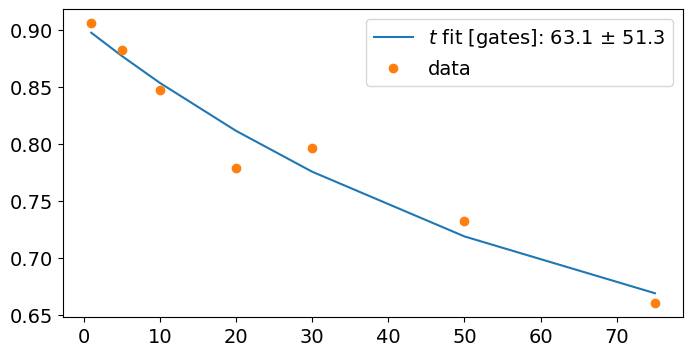

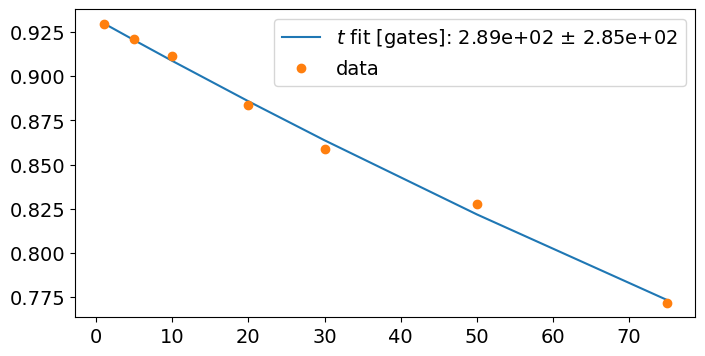

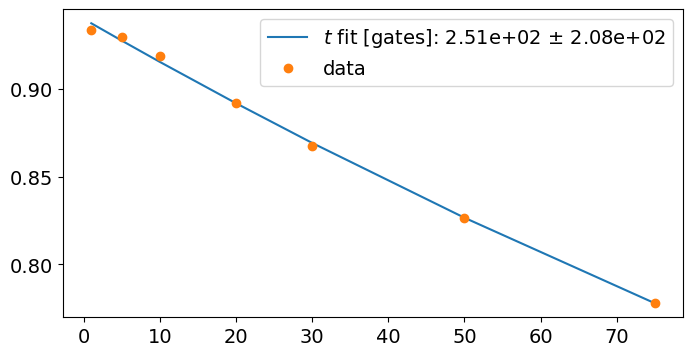

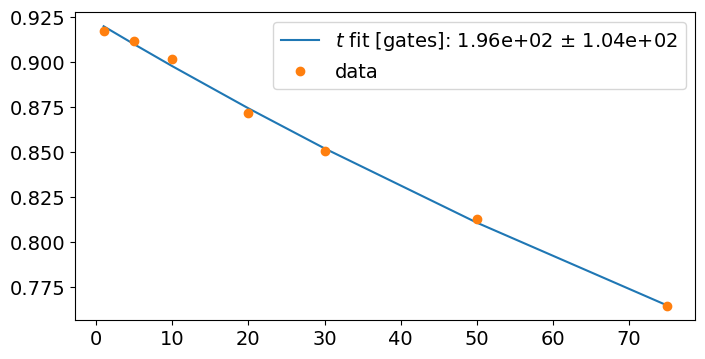

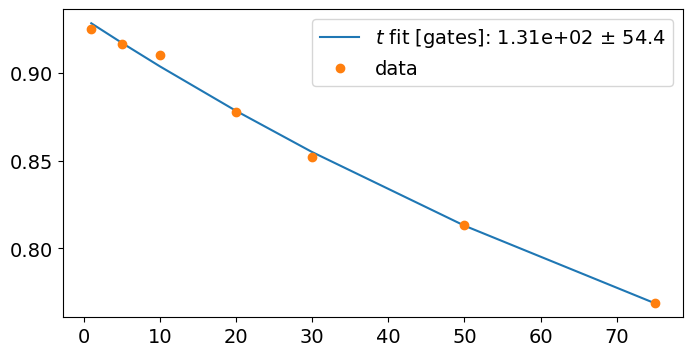

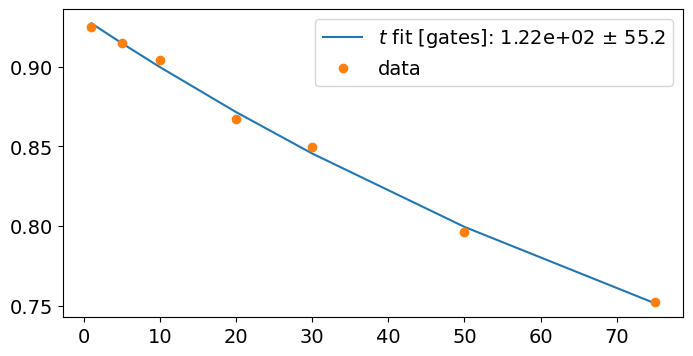

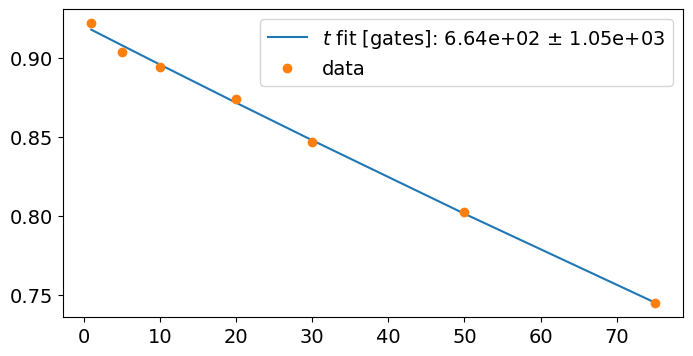

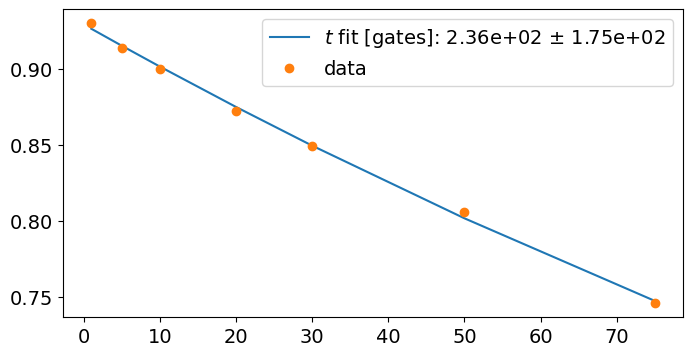

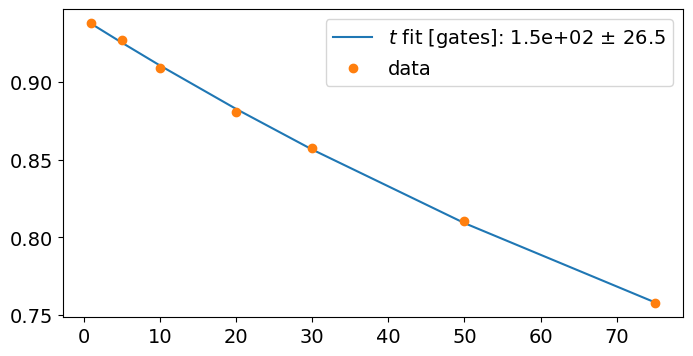

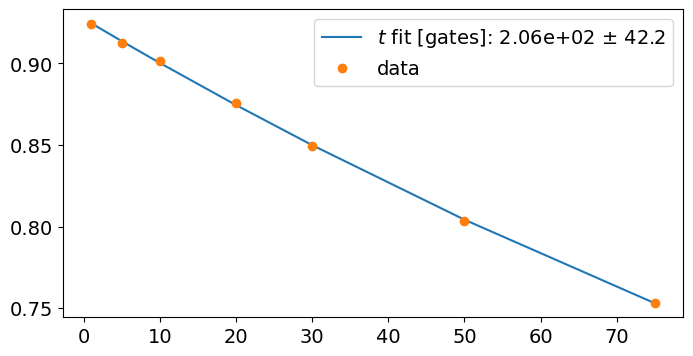

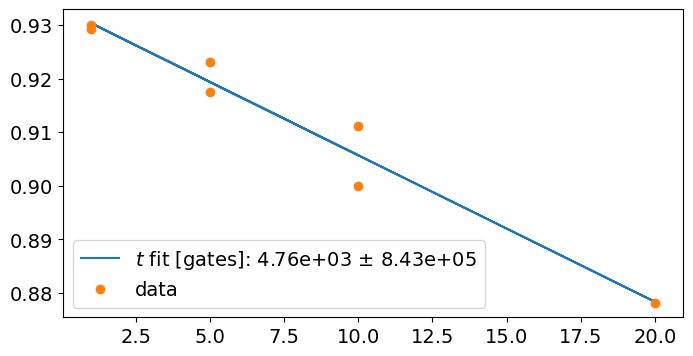

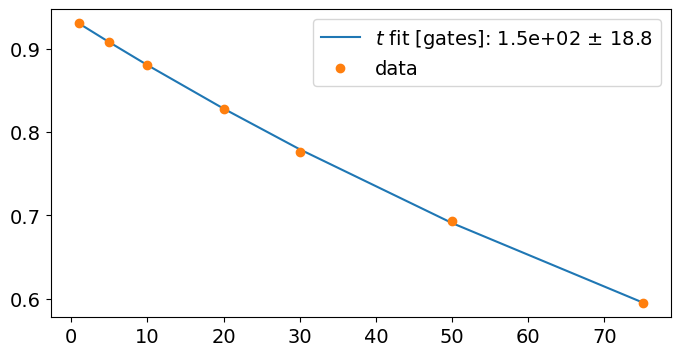

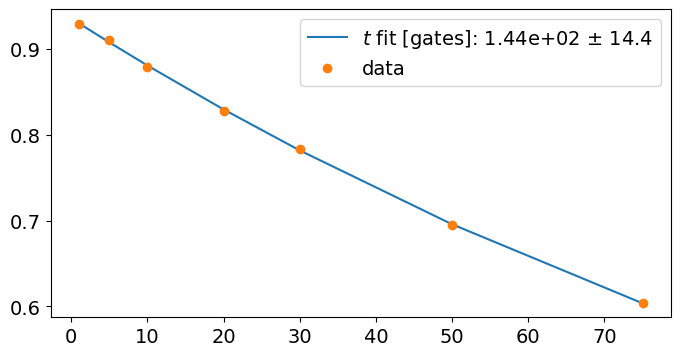

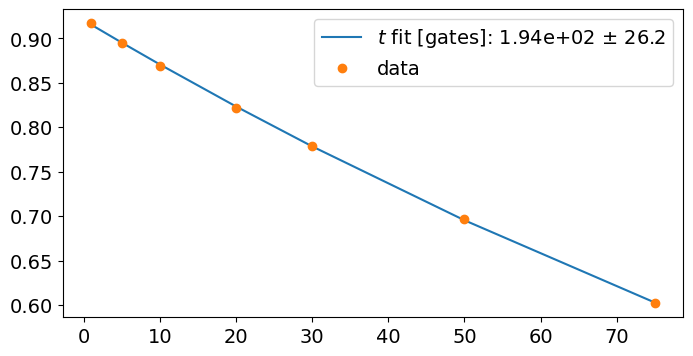

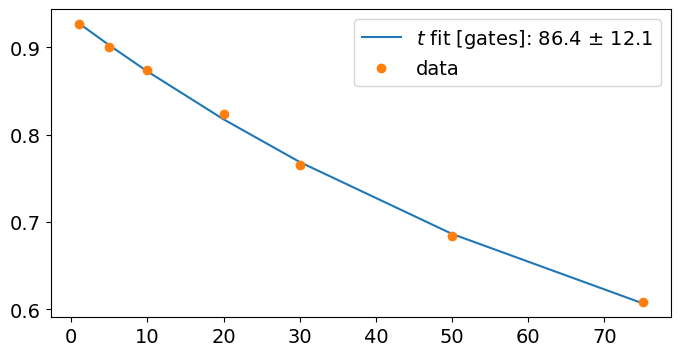

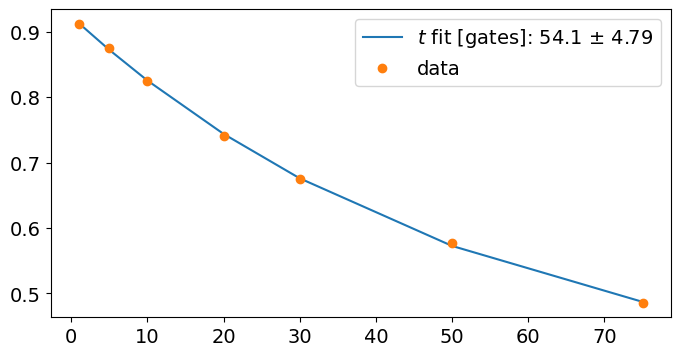

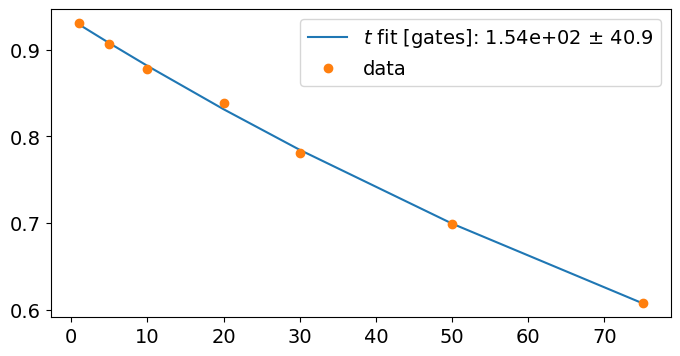

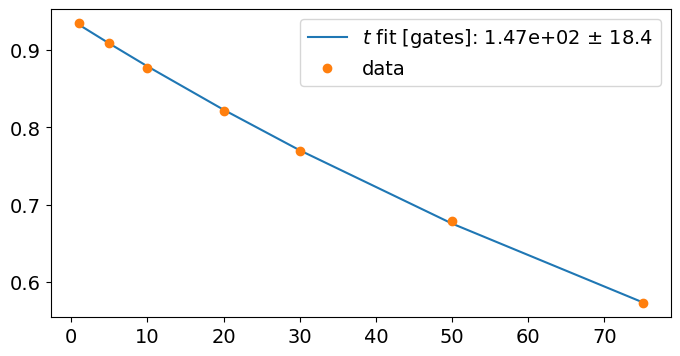

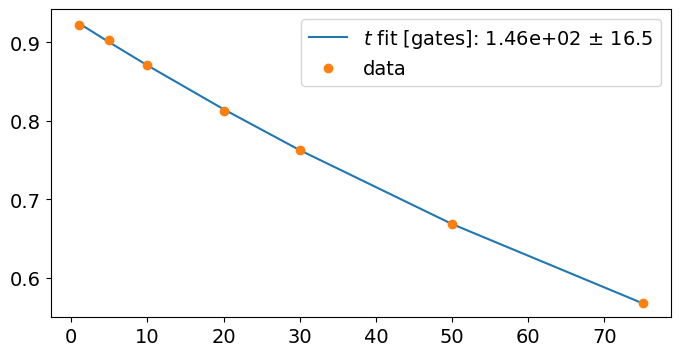

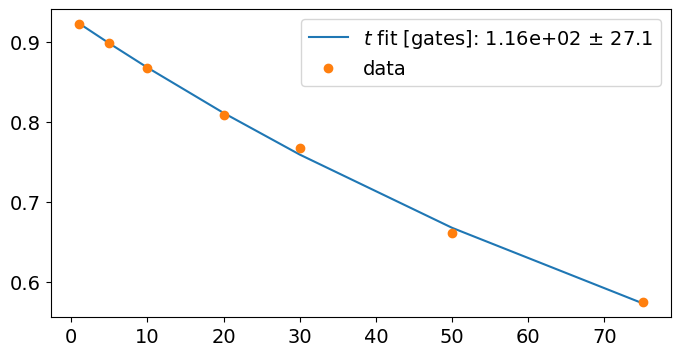

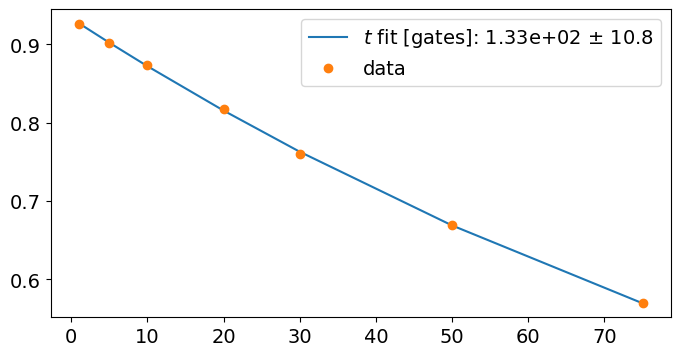

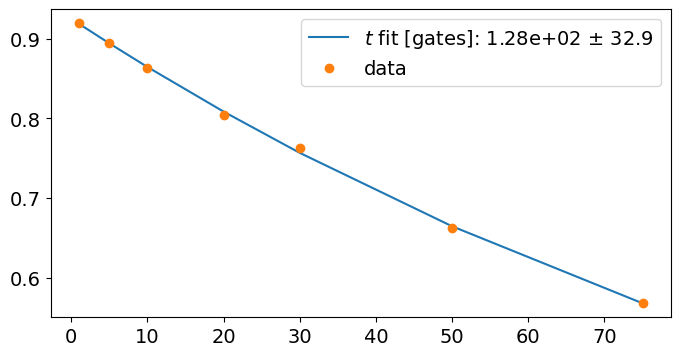

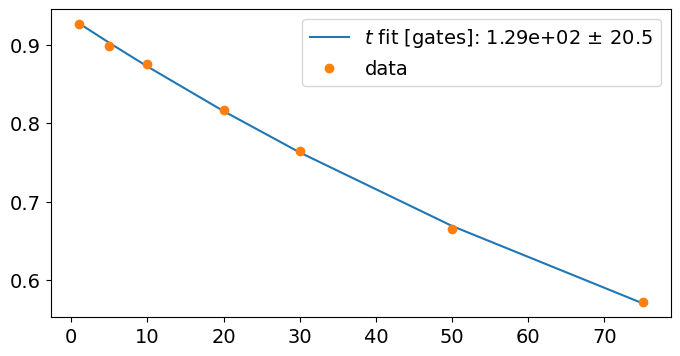

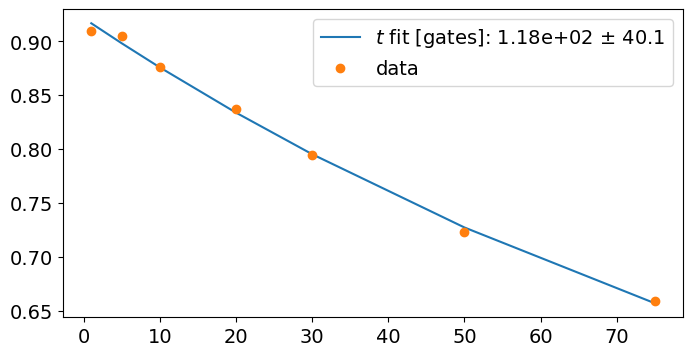

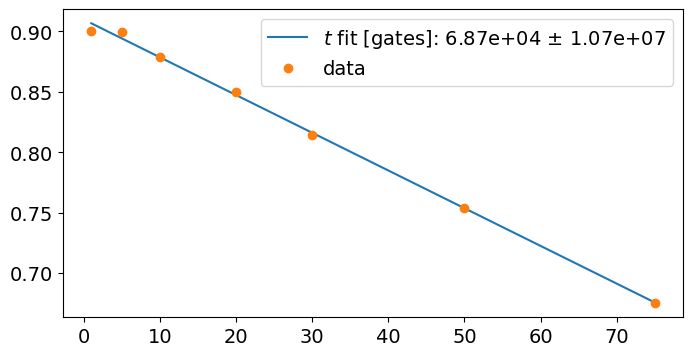

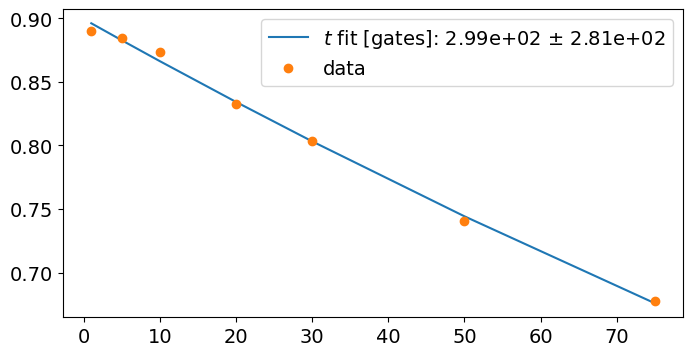

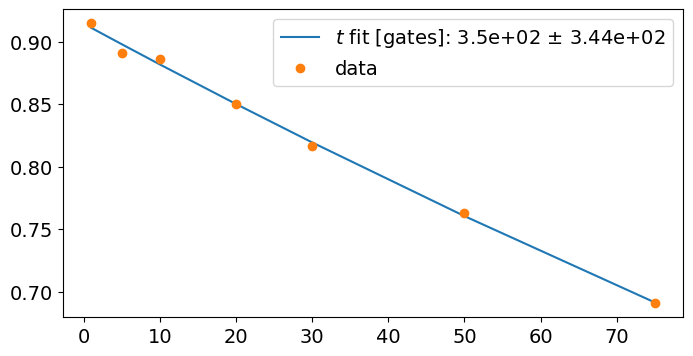

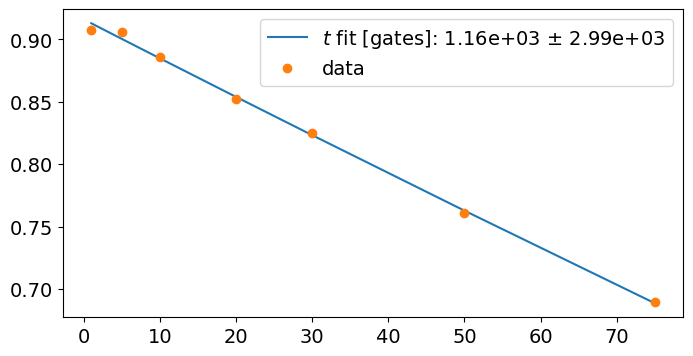

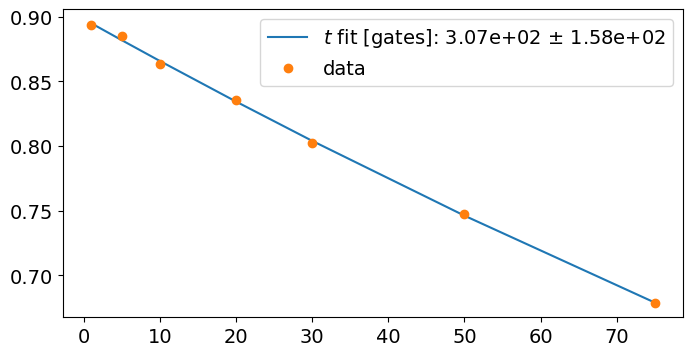

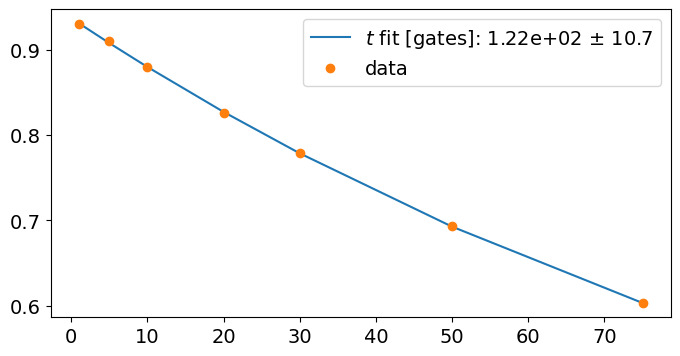

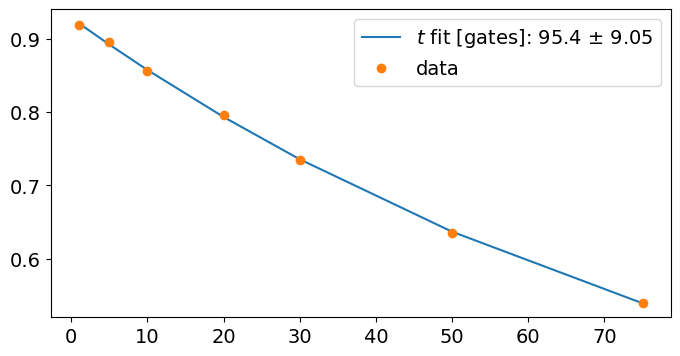

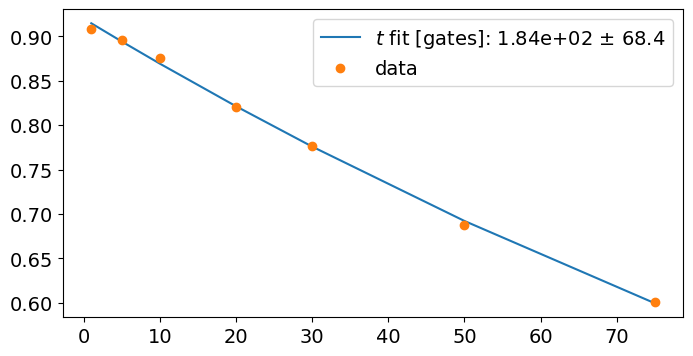

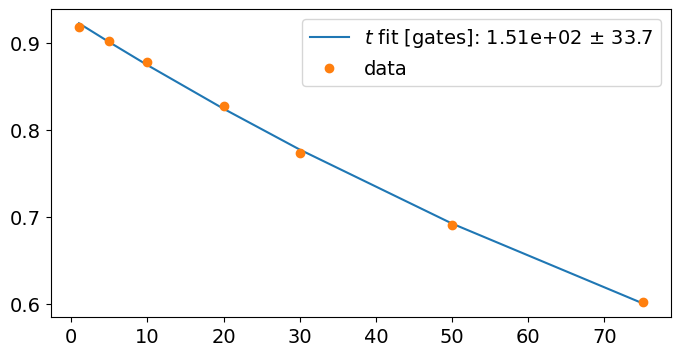

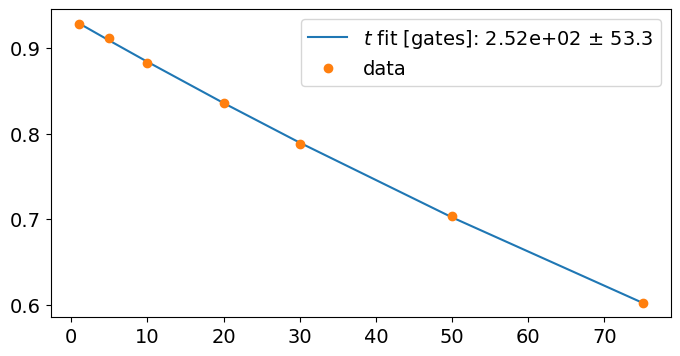

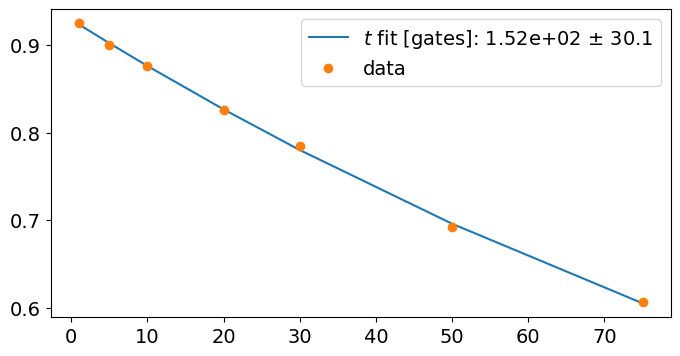

In [196]:
gate_errs, gate_err_errs = fit_all_pairs(df_rb_spec, start_idx=0, end_idx=7)
df_rb_spec_copy = df_rb_spec.copy()
df_rb_spec_copy['fids_upto_100_depth'] = gate_errs
df_rb_spec_copy['fids_upto_100_depth_err'] = gate_err_errs
df_rb_spec_copy

gate_err: 0.997 +/- 0.001
------------------------------------
gate_err: 0.997 +/- 0.000
------------------------------------
gate_err: 0.997 +/- 0.000
------------------------------------
gate_err: 0.993 +/- 0.000
------------------------------------
gate_err: 0.992 +/- 0.000
------------------------------------
gate_err: 0.995 +/- 0.001
------------------------------------
gate_err: 0.994 +/- 0.000
------------------------------------


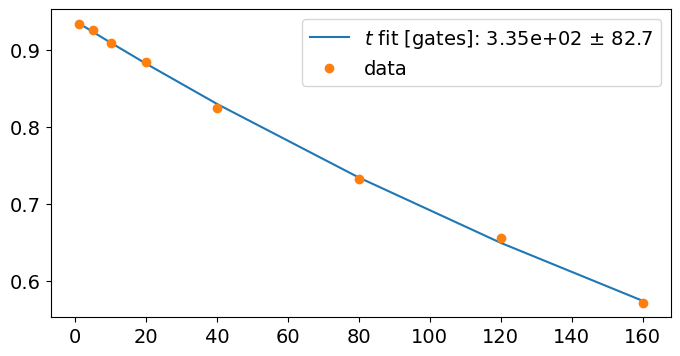

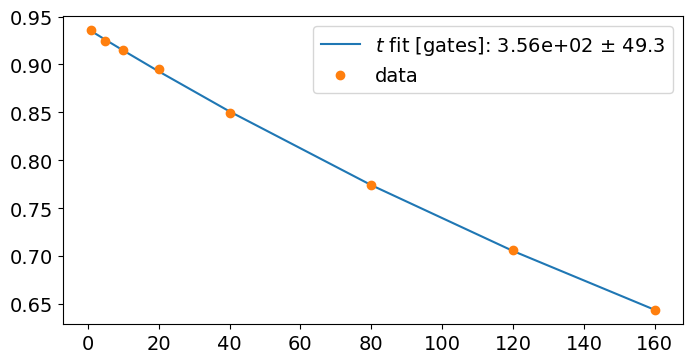

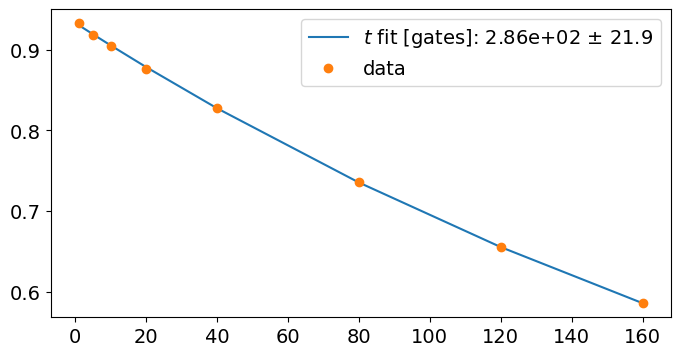

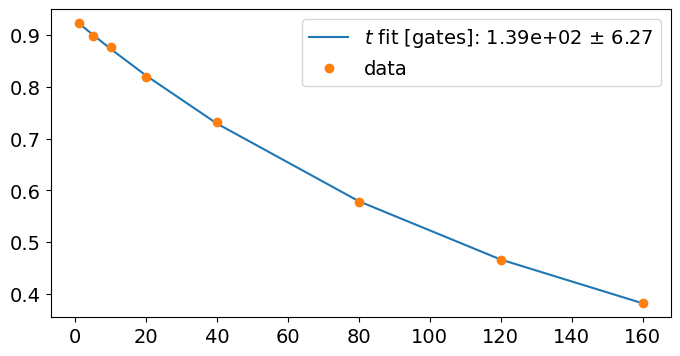

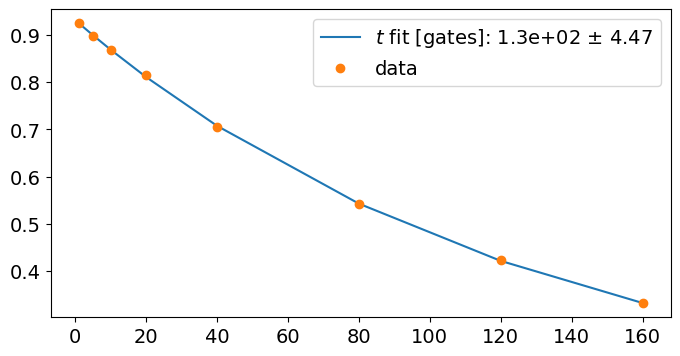

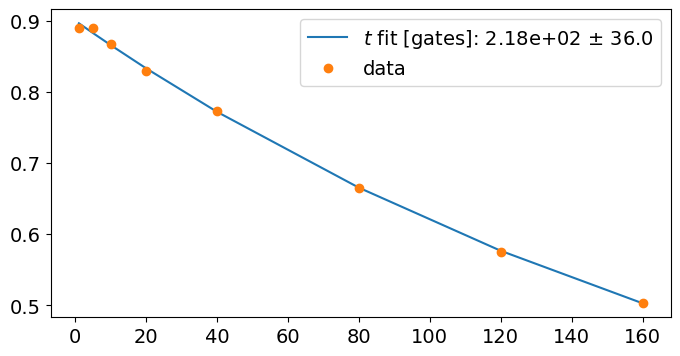

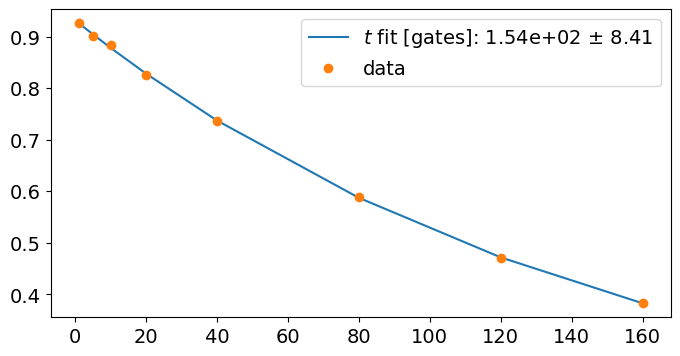

In [189]:
# do the same for reference 
gate_errs, gate_err_errs = fit_all_pairs(df_bs, start_idx=0, end_idx=8, if_print=False)
df_bs_copy = df_bs.copy()
df_bs_copy['fids_upto_100_depth'] = gate_errs
df_bs_copy['fids_upto_100_depth_err'] = gate_err_errs

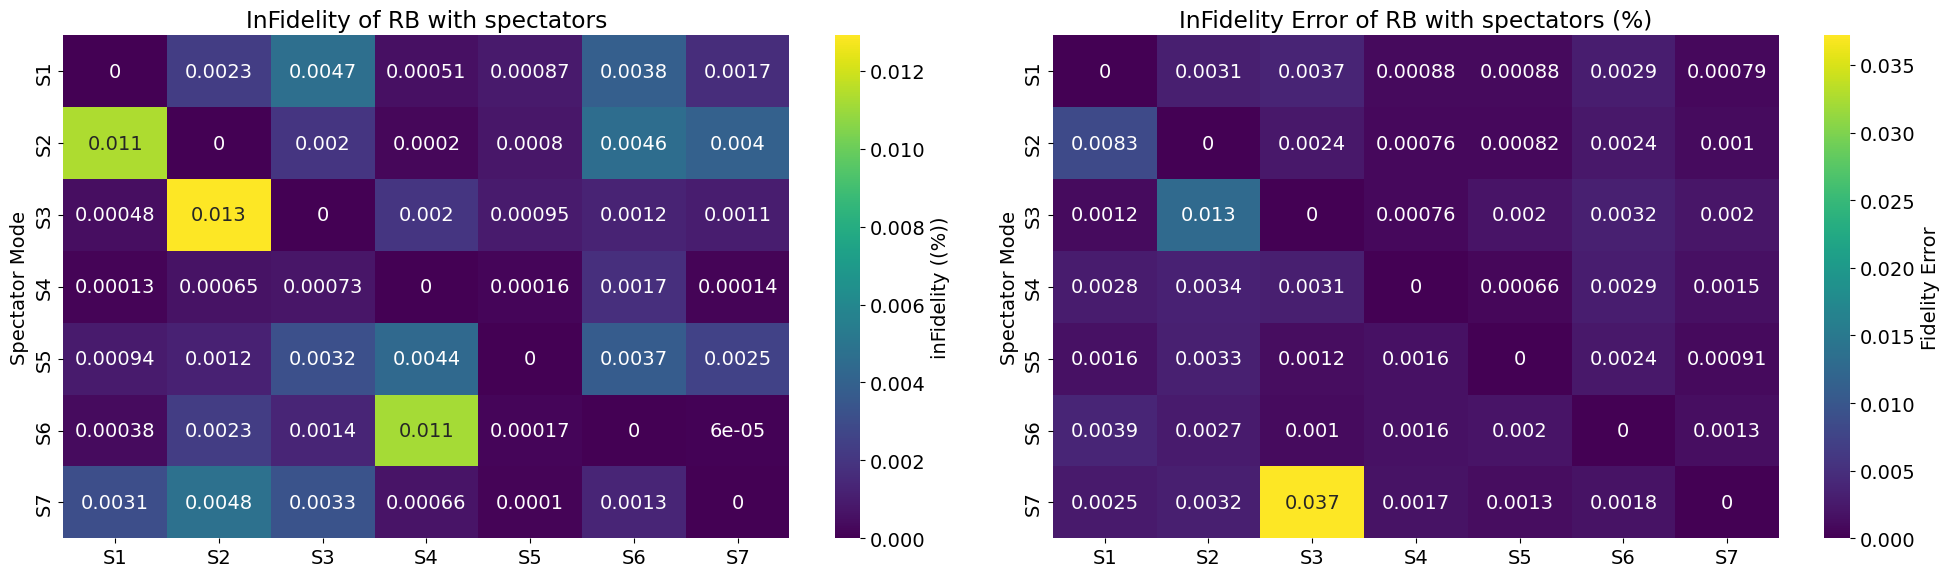

In [197]:
# from the infidelities, get rid of infidelity of bare BS
from matplotlib.colors import LogNorm

infidelities_due_to_spec = np.zeros((7, 7))
infidelities_due_to_spec_err = np.zeros((7, 7))

for i, row in df_rb_spec_copy.iterrows():
    target = row['target']
    spec = row['spectator']
    fid = row['fids_upto_100_depth']
    fid_err = row['fids_upto_100_depth_err']
    bare_fid = df_bs_copy[df_bs_copy['Mode'] == target]['fids_upto_100_depth']
    bare_fid_err = df_bs_copy[df_bs_copy['Mode'] == target]['fids_upto_100_depth_err']
    infidelities_due_to_spec[target -1][spec -1] = 1-fid - (1-bare_fid)
    infidelities_due_to_spec_err[target -1][spec -1] = np.sqrt(np.square(fid_err) + np.square(bare_fid_err))

infidelities_due_to_spec = np.abs(np.array(infidelities_due_to_spec))#*1e3
infidelities_due_to_spec_err = np.array(infidelities_due_to_spec_err)#*1e3
#plot the fidelities matrix and the err matrix
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(infidelities_due_to_spec.T, ax=ax1, cmap='viridis', annot=True, cbar=True, #norm=LogNorm(),
            cbar_kws={'label': 'inFidelity ((%))'})
ax1.set_title('InFidelity of RB with spectators')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_ylabel('Spectator Mode')
# plt.colorbar(label='Log Scale')

sns.heatmap(infidelities_due_to_spec_err.T, ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity Error'})
ax2.set_title('InFidelity Error of RB with spectators (%)')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_ylabel('Spectator Mode')

plt.tight_layout()

In [199]:
0.99**100

0.3660323412732292

In [179]:
infidelities_due_to_spec

array([[0.00000000e+00, 1.08072156e-02, 1.53502522e-03, 6.27522494e-04,
        3.13801361e-03, 1.72736225e-03, 1.17946225e-03],
       [2.43205556e-03, 0.00000000e+00, 1.25406306e-02, 6.76036718e-04,
        1.31659326e-03, 2.15553858e-03, 3.73803460e-03],
       [2.26360654e-05, 7.18370705e-04, 0.00000000e+00, 4.89236455e-04,
        1.98996683e-03, 1.96770166e-04, 2.88908357e-03],
       [1.42170262e-03, 1.42459918e-04, 8.87967320e-04, 0.00000000e+00,
        2.25764382e-03, 1.04794516e-02, 1.26267594e-03],
       [9.96694737e-04, 8.22307184e-04, 6.03554321e-04, 2.39893143e-04,
        0.00000000e+00, 3.15638365e-04, 3.81230025e-04],
       [9.82687970e-04, 4.79133330e-04, 1.75980744e-04, 1.36120511e-03,
        4.52080974e-04, 0.00000000e+00, 1.59473633e-03],
       [1.08947391e-03, 3.83676995e-03, 1.32579901e-03, 4.06990570e-04,
        6.08506020e-04, 8.19090631e-04, 0.00000000e+00]])

In [167]:
approx_gate_mbd_errs = []
for i in range(7):
    approx_gate_mbd_errs.append(np.sum(infidelities_due_to_spec[i]))
df_master['gate_mbd_err'] = approx_gate_mbd_errs
approx_gate_mbd_errs

[0.01901460147470857,
 0.022858889352047385,
 0.006306063796202466,
 0.016451901233106137,
 0.00335931777523768,
 0.005045824461341164,
 0.008086630085044177]

#### Bare exponential fitting 

In [55]:
import seaborn as sns

In [135]:
ast.literal_eval(df_rb_spec['depth_list'][18])

[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300, 500]

In [53]:
df_rb_spec.iloc[18]

target                                                            4
spectator                                                         1
file_list         [302, 303, 304, 305, 306, 307, 308, 309, 310, ...
name              _DualRail_sweep_depth_and_single_spec_and_stor.h5
fids_list         [0.9303296287972529, 0.9078843021988777, 0.880...
fids_post_list    [0.9920964637729575, 0.9867321402229531, 0.982...
depth_list        [1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300,...
p_survival                                                 0.993741
p_survival_err                                             0.000113
Name: 18, dtype: object

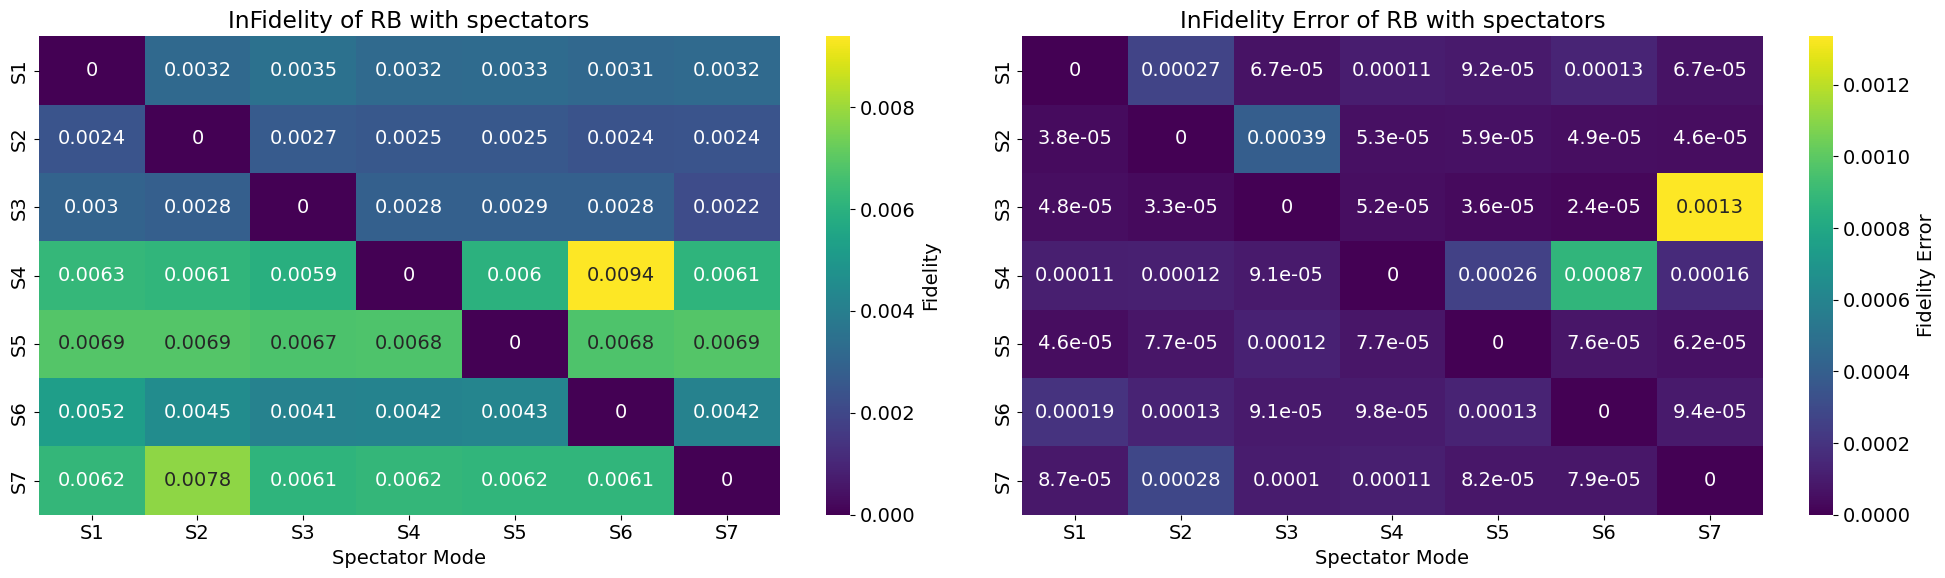

In [56]:
# load exponential fits from dataframe
infidelities = np.zeros((7, 7))
infidelities_err = np.zeros((7, 7))
for i, row in df_rb_spec.iterrows():
    target = row['target']
    spec = row['spectator']
    fid = row['p_survival']
    fid_err = row['p_survival_err']
    infidelities[target -1][spec -1] = 1-fid
    infidelities_err[target -1][spec -1] = fid_err

#plot the fidelities matrix and the err matrix
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(infidelities, ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity'})
ax1.set_title('InFidelity of RB with spectators')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode')

sns.heatmap(infidelities_err, ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity Error'})
ax2.set_title('InFidelity Error of RB with spectators')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_xlabel('Spectator Mode')

plt.tight_layout()




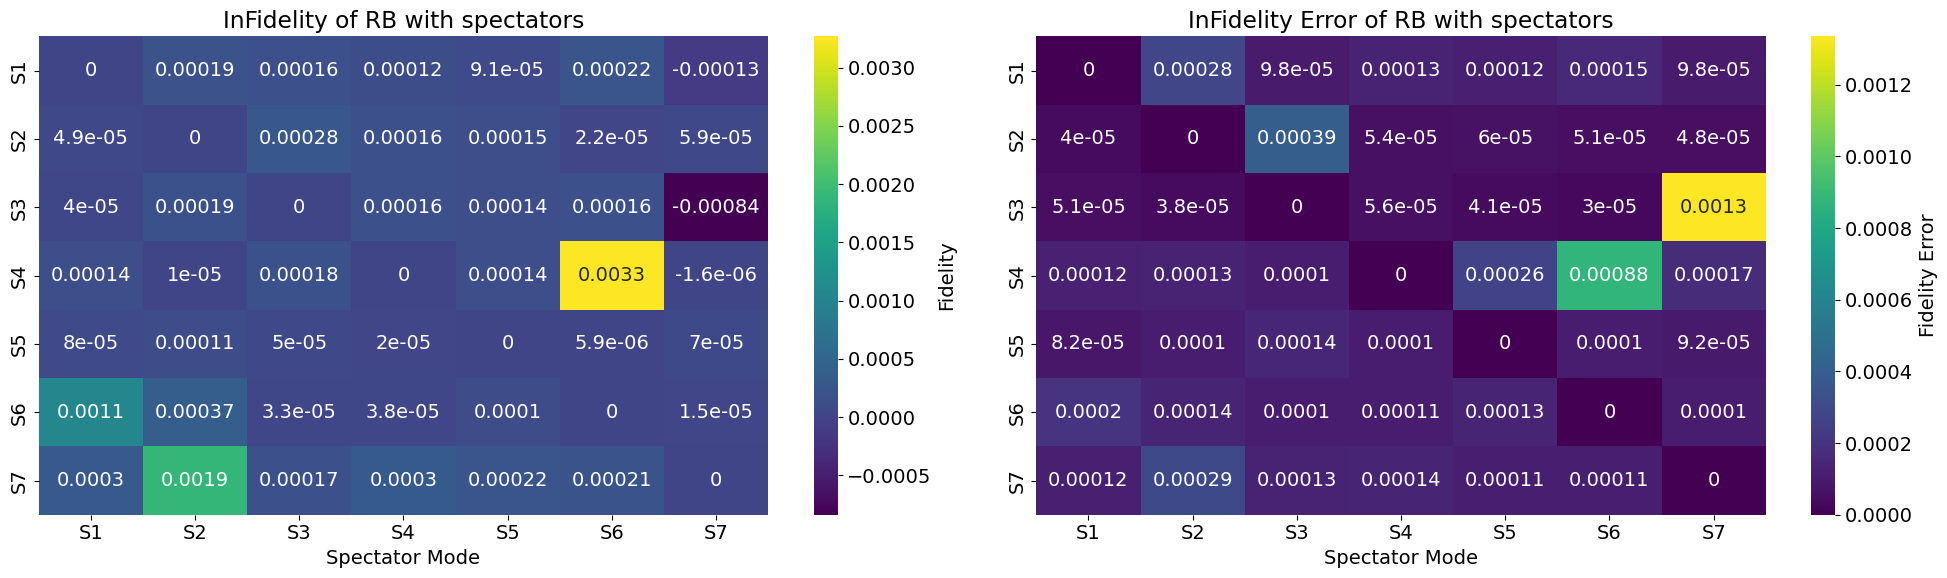

In [58]:
# from the infidelities, get rid of infidelity of bare BS
infidelities_due_to_spec = np.zeros((7, 7))
infidelities_due_to_spec_err = np.zeros((7, 7))

for i, row in df_rb_spec.iterrows():
    target = row['target']
    spec = row['spectator']
    fid = row['p_survival']
    fid_err = row['p_survival_err']
    bare_fid = df_bs[df_bs['Mode'] == target]['fid'].values[0]
    bare_fid_err = df_bs[df_bs['Mode'] == target]['fid_err'].values[0]
    infidelities_due_to_spec[target -1][spec -1] = 1-fid - (1-bare_fid)
    infidelities_due_to_spec_err[target -1][spec -1] = np.sqrt(np.square(fid_err) + np.square(bare_fid_err))

# modifications are from better manual fitting


# fit by eye 
eps_matrix = 0 * np.array([[0, 0.003, 0.0005, 0, 0, 0, 0 ],
              [0, 0, 0.004, 0, 0, 0, 0],
              [0 for i in range(7)],
              [0,0,0,0,0,0.005,0],
              [0 for i in range(7)],
              [0.001, 0, 0, 0, 0, 0, 0],
              [0, 0.002, 0, 0, 0, 0, 0]]) # for alpha = 1
for i in range(7):
    for j in range(6):
        # first take absolute value
        infidelities_due_to_spec[i][j] = np.abs(infidelities_due_to_spec[i][j])
        if infidelities_due_to_spec[i][j] < eps_matrix[i][j] : infidelities_due_to_spec[i][j] = eps_matrix[i][j]

#plot the fidelities matrix and the err matrix
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(infidelities_due_to_spec, ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity'})
ax1.set_title('InFidelity of RB with spectators')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Spectator Mode')

sns.heatmap(infidelities_due_to_spec_err, ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Fidelity Error'})
ax2.set_title('InFidelity Error of RB with spectators')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_xlabel('Spectator Mode')

plt.tight_layout()

In [87]:
infidelities_due_to_spec

array([[ 0.00000000e+00,  3.00000000e-03,  5.00000000e-04,
         1.20102254e-04,  9.13101635e-05,  2.20596011e-04,
        -1.29868582e-04],
       [ 4.91769744e-05,  0.00000000e+00,  4.00000000e-03,
         1.58986439e-04,  1.48954910e-04,  2.22112048e-05,
         5.85784627e-05],
       [ 3.99837017e-05,  1.85519304e-04,  0.00000000e+00,
         1.57577405e-04,  1.39574719e-04,  1.64867610e-04,
        -8.39037799e-04],
       [ 1.35624362e-04,  1.00790672e-05,  1.79396977e-04,
         0.00000000e+00,  1.36322515e-04,  5.00000000e-03,
        -1.60642850e-06],
       [ 7.99244618e-05,  1.05921684e-04,  5.00149325e-05,
         2.01461878e-05,  0.00000000e+00,  5.91039851e-06,
         7.03578027e-05],
       [ 1.05941991e-03,  3.72381784e-04,  3.31239290e-05,
         3.75702724e-05,  1.02266741e-04,  0.00000000e+00,
         1.47524059e-05],
       [ 2.95007713e-04,  2.00000000e-03,  1.67192155e-04,
         3.02210874e-04,  2.21384078e-04,  2.14738206e-04,
         0.0000000

In [88]:
infidelities_due_to_spec_err

array([[0.00000000e+00, 2.80252635e-04, 9.81496288e-05, 1.30046182e-04,
        1.17042013e-04, 1.50290426e-04, 9.83112428e-05],
       [4.04639887e-05, 0.00000000e+00, 3.94741906e-04, 5.42070378e-05,
        6.04086571e-05, 5.08726249e-05, 4.79741756e-05],
       [5.12936709e-05, 3.81608368e-05, 0.00000000e+00, 5.55766496e-05,
        4.11193926e-05, 3.04936824e-05, 1.33498081e-03],
       [1.23465906e-04, 1.26786413e-04, 1.03596650e-04, 0.00000000e+00,
        2.61433127e-04, 8.76057034e-04, 1.66706916e-04],
       [8.22954853e-05, 1.03296536e-04, 1.41027077e-04, 1.03186067e-04,
        0.00000000e+00, 1.02075750e-04, 9.19956064e-05],
       [1.99267300e-04, 1.35126695e-04, 9.99775463e-05, 1.06501503e-04,
        1.32967102e-04, 0.00000000e+00, 1.02679556e-04],
       [1.15686743e-04, 2.93205671e-04, 1.27526727e-04, 1.35419625e-04,
        1.12180132e-04, 1.10385097e-04, 0.00000000e+00]])

In [108]:
infidelities_due_to_spec
# convert to mbd_err_per_gate
for i in range(7):
    for j in range(7):
        infidelities_due_to_spec[i][j] = np.abs(infidelities_due_to_spec[i][j])



In [ ]:
approx_gate_mbd_errs = []
for i in range(7):
    approx_gate_mbd_errs.append(np.sum(infidelities_due_to_spec[i]))
df_master['gate_mbd_err'] = approx_gate_mbd_errs
approx_gate_mbd_errs

NameError: name 'df_master' is not defined

#### Fitting by eye using the formula

In [168]:
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),kappa_T2_echo (MHz),idle:decay_err,idle:dephasing_err,idle_err_due_to_spec_gates,MBD_idle_err,gate_mbd_err
0,S1,0.942926,4.958434,9.098390,0.002791,0.004243,0.001813,0.075465,0.011670,0.122382,0.014225,0.019015
1,S2,1.069160,4.958434,8.972156,0.000797,0.002643,0.000670,0.021959,0.007528,0.094284,0.006453,0.022859
2,S3,1.256963,4.958434,8.784353,0.001252,0.001477,0.000763,0.033815,0.003776,0.061238,0.004247,0.006306
3,S4,1.235632,4.958434,8.805683,0.001674,0.001240,0.001028,0.045035,0.005256,0.044471,0.003574,0.016452
4,S5,1.882097,4.958434,8.159218,0.002811,0.001690,0.001508,0.071102,0.002668,0.033333,0.004236,0.003359
5,S6,1.500950,4.958434,8.540365,0.001696,0.000934,0.000954,0.044765,0.002850,0.097971,0.003956,0.005046
6,S7,2.153588,4.958434,7.887727,0.002694,0.001507,0.001444,0.066873,0.002482,0.024423,0.005837,0.008087


## Thermal Photons

In [59]:
approx_thermal_photon_errs = np.array([0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.025, 0.0125])  
df_master['thermal_photon_err'] = approx_thermal_photon_errs

# Make a bar plot of the errors

In [93]:
df_master['measured_bare'] = np.array([0.00335,0.00239,0.00300,0.00612,0.00679,0.00416,0.00593])
df_master['measured_DR'] = np.array([0.00122,0.00024,0.00077,0.00399,0.00206,0.00134,0.00392])
df_master['measured_bare_err'] = np.array([7.20E-05,
1.27E-05,
1.93E-05,
5.01E-05,
6.83E-05,
4.20E-05,
7.67E-05
])

## During Gates

In [94]:
df_master['idle:decay_err'][i]

0.06844396837716449

In [95]:
df_master.keys()

Index(['Mode', 'gate_time', 'f0g1_other_spec_targ_idle',
       'M1_Si_other_spec_targ_idle', 'kappa_t1s (MHz)', 'kappa_T2 (MHz)',
       'kappa_T2_echo (MHz)', 'idle:decay_err', 'idle:dephasing_err',
       'idle_err_due_to_spec_gates', 'MBD_idle_err', 'gate_mbd_err',
       'measured_bare', 'measured_DR', 'measured_bare_err'],
      dtype='object')

In [96]:
# using new definitions of gates: how many storage operations we have applied. Each storage operations = read*write
# idle:decay_err should be ()^1/7

import copy
df_master_new_def = copy.deepcopy(df_master)
for i in range(7):
    df_master_new_def['idle:decay_err'][i] = 1-(1-df_master['idle:decay_err'][i])**(1/14)
    df_master_new_def['idle:dephasing_err'][i] = 1-(1-df_master['idle:dephasing_err'][i])**(1/14)
    df_master_new_def['MBD_idle_err'][i] = 1-(1-df_master['MBD_idle_err'][i])**(1/14)

    df_master_new_def['idle_err_due_to_spec_gates'][i] = 1-(1-df_master['idle_err_due_to_spec_gates'][i])**(1/14)

    
    df_master_new_def['measured_bare'][i] = 1-(1-df_master['measured_bare'][i])**(1/7*3/2)   # convert DL gate to 1 swaps
    df_master_new_def['gate_mbd_err'][i] = 1-(1-df_master['gate_mbd_err'][i])**(1/7)  

C:\Users\26049\AppData\Local\Temp\ipykernel_7216\2999653256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_new_def['idle:decay_err'][i] = 1-(1-df_master['idle:decay_err'][i])**(1/14)
C:\Users\26049\AppData\Local\Temp\ipykernel_7216\2999653256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_new_def['idle:dephasing_err'][i] = 1-(1-df_master['idle:dephasing_err'][i])**(1/14)
C:\Users\26049\AppData\Local\Temp\ipykernel_7216\2999653256.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

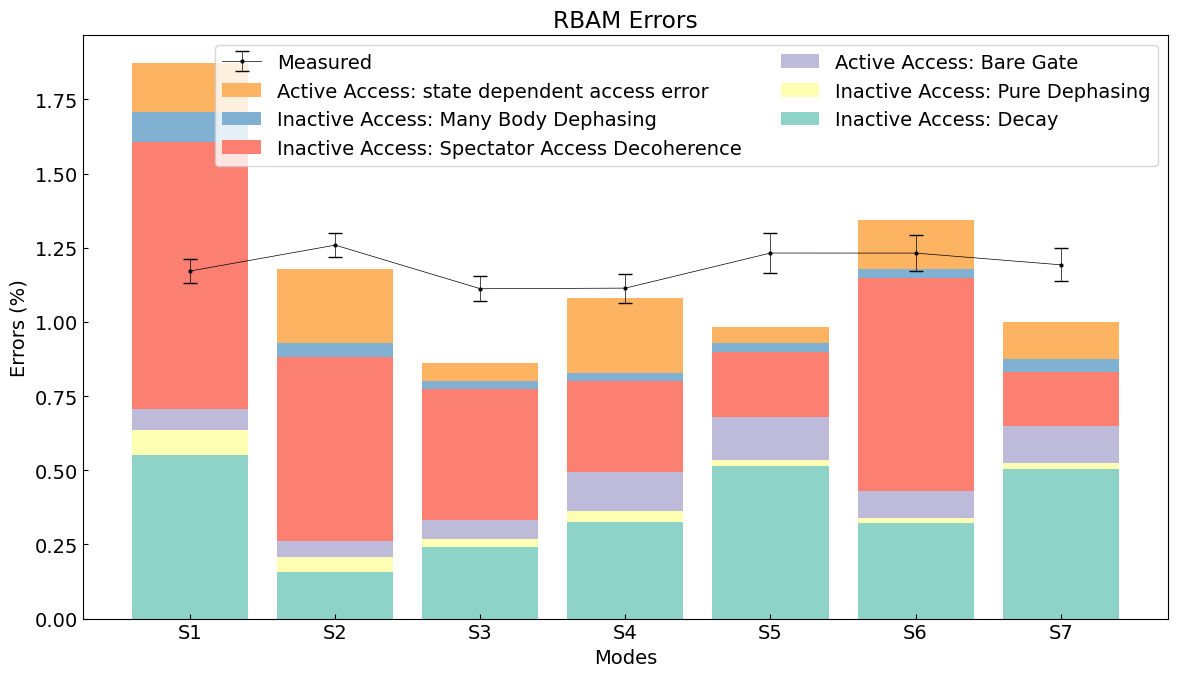

In [97]:
errors = ['idle:decay_err', 'idle:dephasing_err',
       'measured_bare',  'idle_err_due_to_spec_gates', 'MBD_idle_err', 'gate_mbd_err']
labels = ['Inactive Access: Decay', 'Inactive Access: Pure Dephasing',
       'Active Access: Bare Gate', 'Inactive Access: Spectator Access Decoherence', 'Inactive Access: Many Body Dephasing', 'Active Access: state dependent access error', 
       'Thermal Photons']

colort = ['#8dd3c7',
'#ffffb3',
'#bebada',
'#fb8072',
'#80b1d3',
'#fdb462']


fig, ax = plt.subplots(figsize=(12, 7))
bars = [None] * len(errors)
# Convert modes to indices
x = np.arange(len(modes))
bottom = np.zeros(len(modes))

for idx, error in enumerate(errors):
    bars[idx] = ax.bar(x, df_master_new_def[error] * 1e2,bottom=bottom, label=labels[idx], color=colort[idx])
    bottom += df_master_new_def[error] * 1e2
    # bars.append(bar)


# plot actual fidelity 
import ast
fidelities = np.array(ast.literal_eval(df_all_rbam['fidelity'][0]))

# fidelities_new = np.array([0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422])
fidelities_new = np.array([0.988286023993436,
  0.9874131819599585,
  0.9888830087682574,
  0.9888627298370297,
  0.9876800525303363,
  0.9876819095515517,
  0.9880764203490647])
fidelities_err_new = np.array([0.00041485755837685254,
  0.00040563478820520595,
  0.0004169635987301473,
  0.000486199769967945,
  0.0006624437266762003,
  0.0005970754150193145,
  0.0005608351111824674])

# plt.plot(x, (1-fidelities)*1e2, 'o-', label='Measured Infidelity', color='black')
plt.errorbar(x, (1-fidelities_new)*1e2, yerr=fidelities_err_new*1e2, fmt='-o', lw=0.5, color='black', label='Measured',elinewidth=0.5, capsize=5, ms=2)

# Add labels and title
ax.set_xlabel('Modes')
ax.set_ylabel('Errors (%)')
ax.set_title('RBAM Errors')
ax.set_xticks(x)
ax.set_xticklabels(modes)
# Place the legend outside the plot
# Get handles and labels from the current legend
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles and labels
handles, labels = handles[::-1], labels[::-1]

# Place the legend with reversed order
ax.legend(handles, labels, ncol=2)
ax.tick_params(which='both', direction='in')
fig.savefig('rbam_budget3.pdf',dpi=300)


# Show the plot
plt.tight_layout()
plt.show()

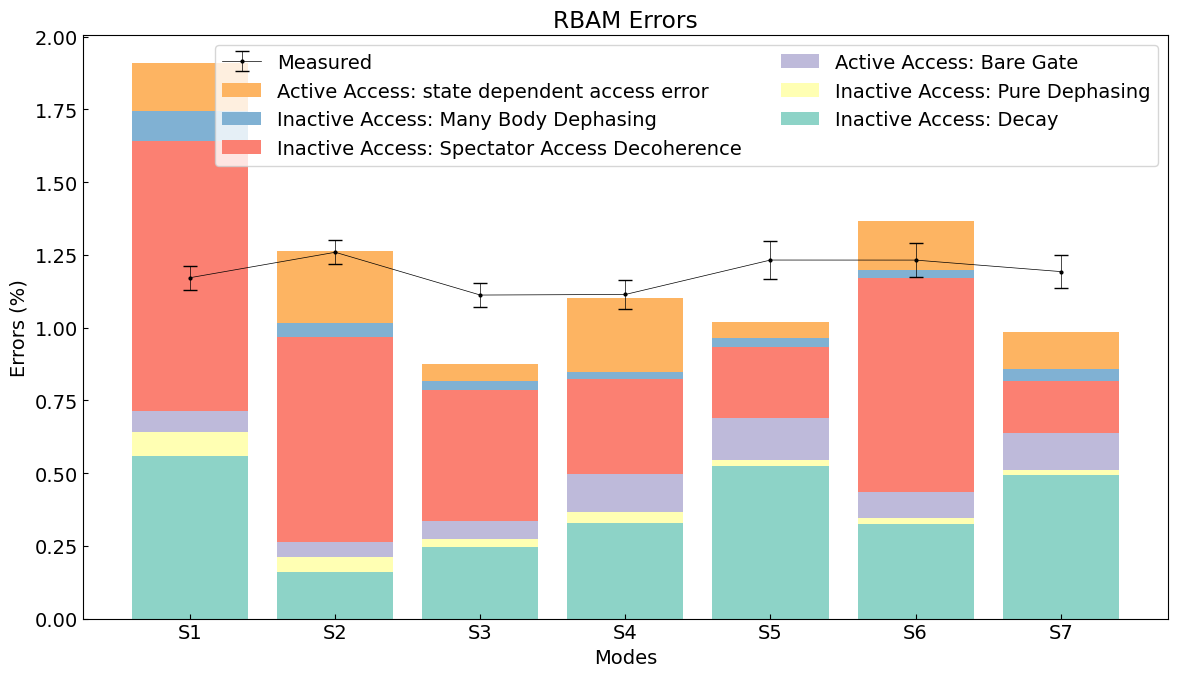

In [190]:
errors = ['idle:decay_err', 'idle:dephasing_err',
       'measured_bare',  'idle_err_due_to_spec_gates', 'MBD_idle_err', 'gate_mbd_err']
labels = ['Inactive Access: Decay', 'Inactive Access: Pure Dephasing',
       'Active Access: Bare Gate', 'Inactive Access: Spectator Access Decoherence', 'Inactive Access: Many Body Dephasing', 'Active Access: state dependent access error', 
       'Thermal Photons']

colort = ['#8dd3c7',
'#ffffb3',
'#bebada',
'#fb8072',
'#80b1d3',
'#fdb462']


fig, ax = plt.subplots(figsize=(12, 7))
bars = [None] * len(errors)
# Convert modes to indices
x = np.arange(len(modes))
bottom = np.zeros(len(modes))

for idx, error in enumerate(errors):
    bars[idx] = ax.bar(x, df_master_new_def[error] * 1e2,bottom=bottom, label=labels[idx], color=colort[idx])
    bottom += df_master_new_def[error] * 1e2
    # bars.append(bar)


# plot actual fidelity 
import ast
fidelities = np.array(ast.literal_eval(df_all_rbam['fidelity'][0]))

# fidelities_new = np.array([0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422])
fidelities_new = np.array([0.988286023993436,
  0.9874131819599585,
  0.9888830087682574,
  0.9888627298370297,
  0.9876800525303363,
  0.9876819095515517,
  0.9880764203490647])
fidelities_err_new = np.array([0.00041485755837685254,
  0.00040563478820520595,
  0.0004169635987301473,
  0.000486199769967945,
  0.0006624437266762003,
  0.0005970754150193145,
  0.0005608351111824674])

# plt.plot(x, (1-fidelities)*1e2, 'o-', label='Measured Infidelity', color='black')
plt.errorbar(x, (1-fidelities_new)*1e2, yerr=fidelities_err_new*1e2, fmt='-o', lw=0.5, color='black', label='Measured',elinewidth=0.5, capsize=5, ms=2)

# Add labels and title
ax.set_xlabel('Modes')
ax.set_ylabel('Errors (%)')
ax.set_title('RBAM Errors')
ax.set_xticks(x)
ax.set_xticklabels(modes)
# Place the legend outside the plot
# Get handles and labels from the current legend
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles and labels
handles, labels = handles[::-1], labels[::-1]

# Place the legend with reversed order
ax.legend(handles, labels, ncol=2)
ax.tick_params(which='both', direction='in')
fig.savefig('rbam_budget3.pdf',dpi=300)


# Show the plot
plt.tight_layout()
plt.show()

### For eesh presentation

In [111]:
# change font size 
plt.rcParams.update({'font.size': 20})

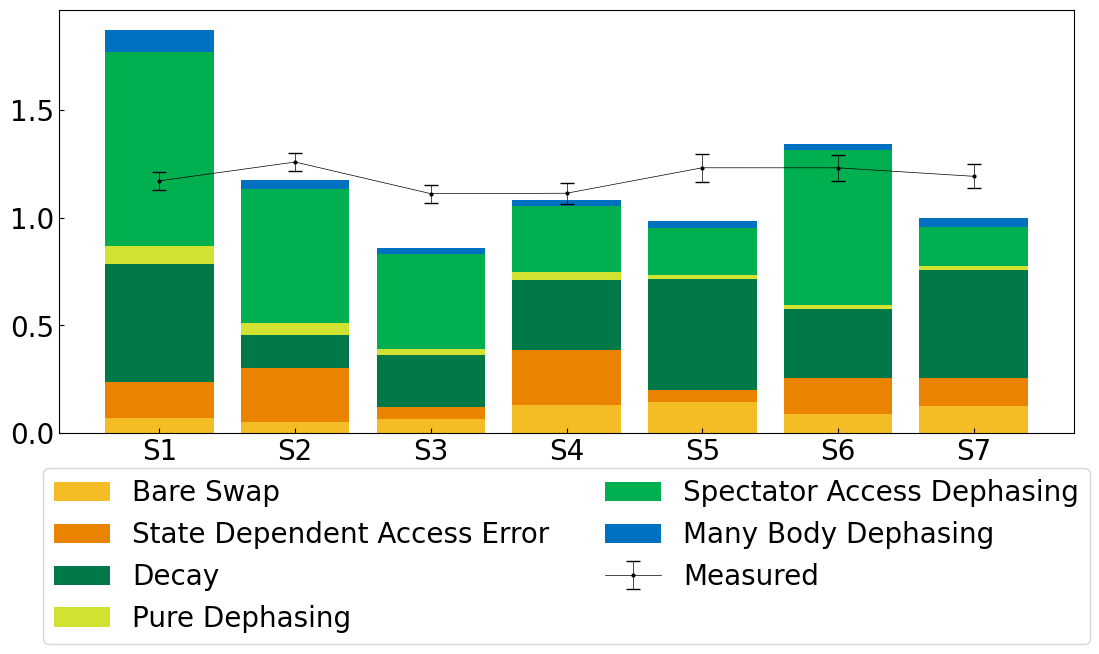

In [143]:
errors = ['measured_bare', 'gate_mbd_err', 'idle:decay_err', 'idle:dephasing_err',
         'idle_err_due_to_spec_gates', 'MBD_idle_err',]
labels = ['Bare Swap', 
          'State Dependent Access Error',
          'Decay', 'Pure Dephasing',
       
       'Spectator Access Dephasing',
         'Many Body Dephasing',
            
       ]

colort = ['#f5bd25',
'#e98300',
'#007848',
'#d1e231',
'#00b050',
'#0070c0']
show_errs_idx = 6
for idx in range(show_errs_idx, len(errors)):
  colort[idx] = '#cccccc'


fig, ax = plt.subplots(figsize=(12, 7))
bars = [None] * len(errors)
# Convert modes to indices
x = np.arange(len(modes))
bottom = np.zeros(len(modes))

for idx, error in enumerate(errors[:6]):
    bars[idx] = ax.bar(x, df_master_new_def[error] * 1e2,bottom=bottom, label=labels[idx], color=colort[idx])
    bottom += df_master_new_def[error] * 1e2
    # bars.append(bar)


# plot actual fidelity 
import ast
fidelities = np.array(ast.literal_eval(df_all_rbam['fidelity'][0]))

# fidelities_new = np.array([0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422])
fidelities_new = np.array([0.988286023993436,
  0.9874131819599585,
  0.9888830087682574,
  0.9888627298370297,
  0.9876800525303363,
  0.9876819095515517,
  0.9880764203490647])
fidelities_err_new = np.array([0.00041485755837685254,
  0.00040563478820520595,
  0.0004169635987301473,
  0.000486199769967945,
  0.0006624437266762003,
  0.0005970754150193145,
  0.0005608351111824674])

# plt.plot(x, (1-fidelities)*1e2, 'o-', label='Measured Infidelity', color='black')
plt.errorbar(x, (1-fidelities_new)*1e2, yerr=fidelities_err_new*1e2, fmt='-o', lw=0.5, color='black', label='Measured',elinewidth=0.5, capsize=5, ms=2)

# Add labels and title
# ax.set_xlabel('Modes')
# ax.set_ylabel('Errors (%)')
# ax.set_title('RBAM Errors')
ax.set_xticks(x)
ax.set_xticklabels(modes)
# Place the legend outside the plot
# Get handles and labels from the current legend
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles and labels
handles, labels = handles[::-1], labels[::-1]

# Place the legend with reversed order
ax.legend( ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.05))
ax.tick_params(which='both', direction='in')
eesh_mm_path = data_parent + '\RAM_paper_results\FIGURES\eesh_mm'
plt.tight_layout()
plt.show()
# plt.subplots_adjust(bottom=-0.3)
fig.savefig(eesh_mm_path + '\\rbam_budget_eesh_prez3.pdf',dpi=300)


# Show the plot



In [139]:
range(show_errs_idx, len(errors))

NameError: name 'show_errs_idx' is not defined

'H:\\Shared drives\\SLab\\Multimode\\experiment\\240911'

### Digression ENd

In [ ]:
### 

In [191]:
for i in errors:
    print(df_master_new_def[i])

0    0.005589
1    0.001585
2    0.002454
3    0.003286
4    0.005254
5    0.003266
6    0.004932
Name: idle:decay_err, dtype: float64
0    0.000838
1    0.000540
2    0.000270
3    0.000376
4    0.000191
5    0.000204
6    0.000177
Name: idle:dephasing_err, dtype: float64
0    0.000719
1    0.000513
2    0.000644
3    0.001315
4    0.001459
5    0.000893
6    0.001274
Name: measured_bare, dtype: float64
0    0.009281
1    0.007049
2    0.004504
3    0.003244
4    0.002419
5    0.007338
6    0.001765
Name: idle_err_due_to_spec_gates, dtype: float64
0    0.001023
1    0.000462
2    0.000304
3    0.000256
4    0.000303
5    0.000283
6    0.000418
Name: MBD_idle_err, dtype: float64
0    0.001637
1    0.002489
2    0.000578
3    0.002550
4    0.000561
5    0.001666
6    0.001270
Name: gate_mbd_err, dtype: float64


In [194]:
1 - (0.983**(1/7))

0.0024464538042709982

In [192]:
mode_no = 6
total_err = 0
for i in errors:
    print(df_master_new_def[i])
    total_err += df_master_new_def[i][mode_no-1]
print('total_err:', total_err)

0    0.005589
1    0.001585
2    0.002454
3    0.003286
4    0.005254
5    0.003266
6    0.004932
Name: idle:decay_err, dtype: float64
0    0.000838
1    0.000540
2    0.000270
3    0.000376
4    0.000191
5    0.000204
6    0.000177
Name: idle:dephasing_err, dtype: float64
0    0.000719
1    0.000513
2    0.000644
3    0.001315
4    0.001459
5    0.000893
6    0.001274
Name: measured_bare, dtype: float64
0    0.009281
1    0.007049
2    0.004504
3    0.003244
4    0.002419
5    0.007338
6    0.001765
Name: idle_err_due_to_spec_gates, dtype: float64
0    0.001023
1    0.000462
2    0.000304
3    0.000256
4    0.000303
5    0.000283
6    0.000418
Name: MBD_idle_err, dtype: float64
0    0.001637
1    0.002489
2    0.000578
3    0.002550
4    0.000561
5    0.001666
6    0.001270
Name: gate_mbd_err, dtype: float64
total_err: 0.013649794239835589


In [232]:
df_master

,Mode,gate_time,f0g1_other_spec_targ_idle,M1_Si_other_spec_targ_idle,kappa_t1s (MHz),kappa_T2 (MHz),coherence_err,idle:coherence_err,gate: coherence_err,gate_mbd_err,thermal_photon_err,idle_err_due_to_spec_gates,MBD_idle_err,idle:decay_err,idle:dephasing_err,gate: decay_err,gate: dephasing_err,kappa_T2_echo (MHz)
0,S1,0.977143,5.314091,8.972618,0.002791,0.004243,0.060617,0.060617,0.004146,0.010,0.0125,0.044811,0.007280,0.039874,0.005965,0.002727,0.000408,0.001813
1,S2,1.130904,5.314091,8.818856,0.000797,0.002643,0.037358,0.037358,0.002989,0.010,0.0125,0.030010,0.003284,0.011263,0.003833,0.000901,0.000307,0.000670
2,S3,1.333910,5.314091,8.615850,0.001252,0.001477,0.020570,0.020570,0.001970,0.002,0.0125,0.020990,0.002157,0.017434,0.001917,0.001669,0.000184,0.000763
3,S4,1.254287,5.314091,8.695473,0.001674,0.001240,0.023451,0.023451,0.002100,0.010,0.0125,0.014781,0.001822,0.023451,0.002682,0.002100,0.000240,0.001028
4,S5,1.973198,5.314091,7.976562,0.002811,0.001690,0.037365,0.037365,0.005547,0.002,0.0125,0.010755,0.002151,0.037365,0.001354,0.005547,0.000201,0.001508
5,S6,1.595310,5.314091,8.354450,0.001696,0.000934,0.023187,0.023187,0.002706,0.004,0.0250,0.033680,0.002007,0.023187,0.001445,0.002706,0.000169,0.000954
6,S7,1.685008,5.314091,8.264752,0.002694,0.001507,0.036581,0.036581,0.004539,0.004,0.0125,0.008622,0.003094,0.036581,0.001313,0.004539,0.000163,0.001444


In [230]:
df_all_rbam['fidelity'][0]

'[0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422]'

## During Idling 

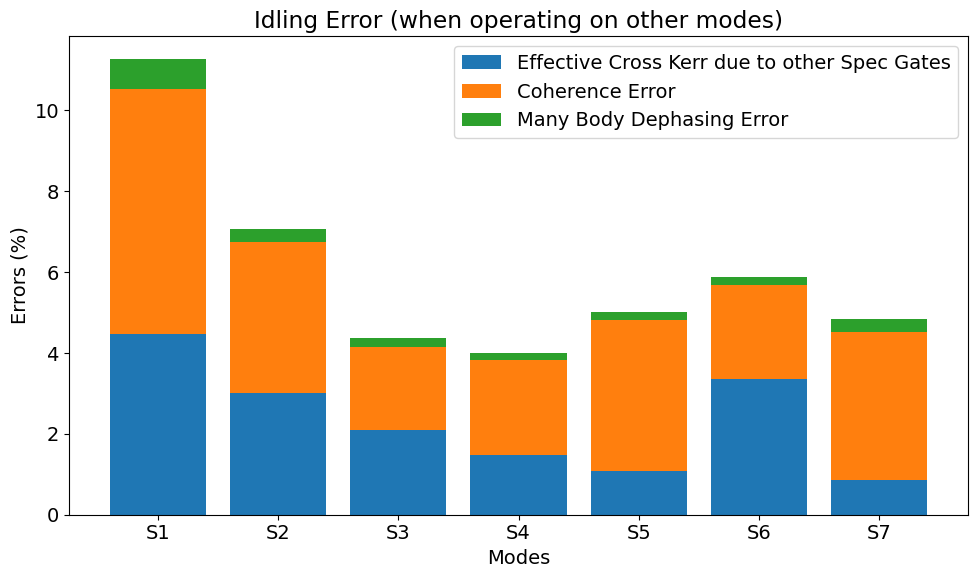

In [138]:
idle_err_due_to_spec_gates = df_master['idle_err_due_to_spec_gates'] * 1e2
coherence_err = df_master['coherence_err']*1e2
MBD_idle_err = df_master['MBD_idle_err']*1e2

# Convert modes to indices
x = np.arange(len(modes))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bar1 = ax.bar(x, idle_err_due_to_spec_gates, label='Effective Cross Kerr due to other Spec Gates')
bar2 = ax.bar(x, coherence_err, bottom=idle_err_due_to_spec_gates, label='Coherence Error')
bar3 = ax.bar(x, MBD_idle_err, bottom=idle_err_due_to_spec_gates + coherence_err, label='Many Body Dephasing Error')

# Add labels and title
ax.set_xlabel('Modes')
ax.set_ylabel('Errors (%)')
ax.set_title('Idling Error (when operating on other modes)')
ax.set_xticks(x)
ax.set_xticklabels(modes)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Looking at threshold

In [3]:
import numpy as np
import matplotlib.pyplot as plt

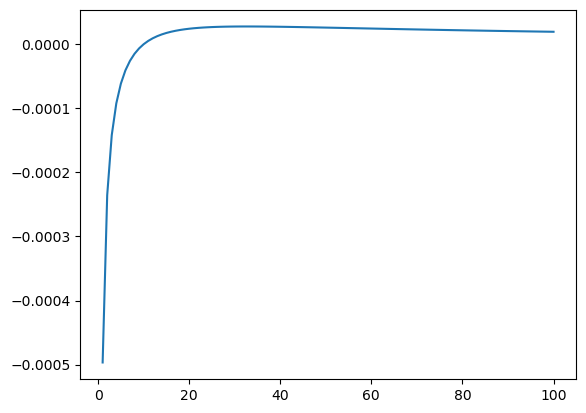

In [4]:
p = 1e-3
p0 = 1e-2

def func(N): 
    res = 1/N * (p0**((np.sqrt(N) - 1)/(np.sqrt(N))) * p **(1/(np.sqrt(N))) - p)
    return res
def func_new(N): 
    '''k<\frac{1}{2N}*\left(p_0^{\frac{\sqrt{N}-\sqrt{2}}{\sqrt{N}}}p^{\frac{\sqrt{2}}{\sqrt{N}}}-p\right)'''
    res = 1/(2*N) * (p0**((np.sqrt(N) - np.sqrt(2))/(np.sqrt(N))) * p **(2/(np.sqrt(N))) - p)
    return res

xlist = np.linspace(1, 100, 100)
ylist = [func_new(x) for x in xlist]
plt.plot(xlist, ylist)
#plt.yscale('log')
#plt.xscale('log')


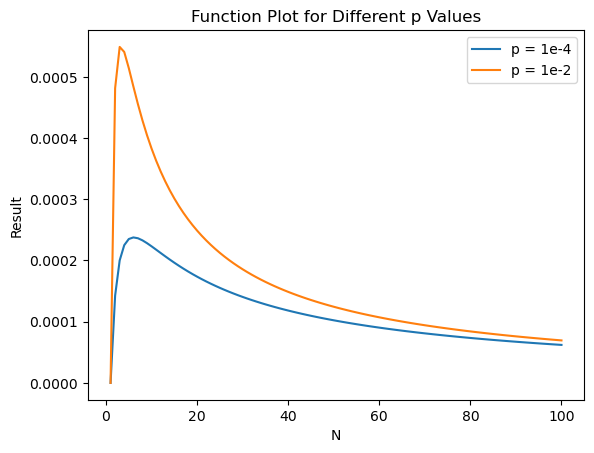

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(N, p, p0): 
    res = 1/N * (p0**((np.sqrt(N) - 1)/(np.sqrt(N))) * p **(1/(np.sqrt(N))) - p)
    return res

def func_new(N, p, p0):
    '''k<\frac{1}{2N}*\left(p_0^{\frac{\sqrt{N}-\sqrt{2}}{\sqrt{N}}}p^{\frac{\sqrt{2}}{\sqrt{N}}}-p\right)'''
    res = 1/(2*N) * (p0**((np.sqrt(N) - np.sqrt(2))/(np.sqrt(N))) * p **(np.sqrt(2)/(np.sqrt(N))) - p)
    return res

# Example parameters
p0 = 1e-2
p1 = 1e-4
p2 = 1e-3

# Generate data
xlist = np.linspace(1, 100, 100)
ylist1 = [func(x, p1, p0) for x in xlist]
ylist2 = [func(x, p2, p0) for x in xlist]

# Plot the data
plt.plot(xlist, ylist1, label='p = 1e-4')
plt.plot(xlist, ylist2, label='p = 1e-2')
plt.xlabel('N')
plt.ylabel('Result')
plt.title('Function Plot for Different p Values')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.show()

## Surface Code 
$$D \log{\frac{p}{p0}} =  D' \log{\frac{p + 2Nk/16}{p0}}$$

$$ND^2 > 2D'^2$$

## LDPC Code 

$$D \log{\frac{p}{p0}} =  D' \log{\frac{p + 2Nk/16}{p0}}$$

$$ND\times 10 > 2D' \times 10$$

$$ k> \frac{16}{2N} ((\frac{p}{p0})^\frac{2}{N}  p0 - p)



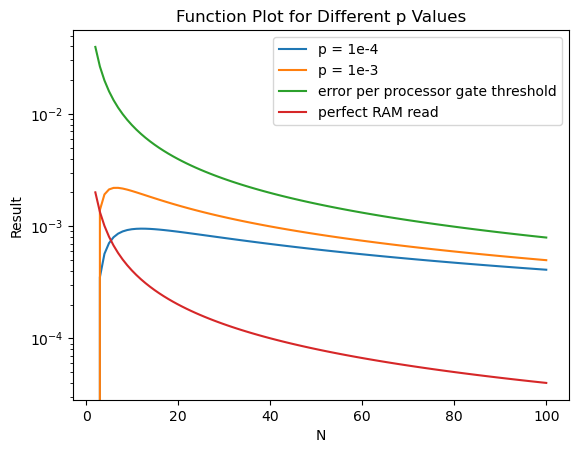

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(N, p, p0): 
    res = 1/N * (p0**((np.sqrt(N) - 1)/(np.sqrt(N))) * p **(1/(np.sqrt(N))) - p)
    return res

def func_new(N, p, p0):
    '''
    
    k>\frac{1}{2N}*\left(p_0^{\frac{\sqrt{N}-\sqrt{2}}{\sqrt{N}}}p^{\frac{\sqrt{2}}{\sqrt{N}}}-p\right)'''
    res = 16/(2*N) * (p0**((np.sqrt(N) - np.sqrt(2))/(np.sqrt(N))) * p **(np.sqrt(2)/(np.sqrt(N))) - p)
    return res

def func_ldpc(N, p, p0):
    '''$$ k> \frac{16}{2N} ((\frac{p}{p0})^\frac{2}{N}  p0 - p)'''
    k = 16/(2*N) * ((p/p0)**(2/N) * p0 - p)
    return k

def k_below_threshold(N, p, p0):
    '''Random read fidelity is below threshold'''
    k = (p0 - p)/(2*N)*16
    return k

# Example parameters
p0 = 1e-2
p1 = 1e-4
p2 = 1e-3
p3 = 1e-2

p_read = 0.004

def func_read_perfect_ram(N, p_read): 
    return 1 - (1-p_read)**(1/N)

# Generate data
xlist = np.linspace(2, 100, 100)
ylist1 = [func_new(x, p1, p0) for x in xlist]
ylist2 = [func_new(x, p2, p0) for x in xlist]
ylist3 = [func_new(x, p3, p0) for x in xlist]
ylist4 = [k_below_threshold(x, p1, p0) for x in xlist]
ylist5 = [func_read_perfect_ram(x, p_read) for x in xlist]

# Plot the data
plt.plot(xlist, ylist1, label='p = 1e-4')
plt.plot(xlist, ylist2, label='p = 1e-3')
# plt.plot(xlist, ylist3, label='p = 1e-2')
plt.plot(xlist, ylist4, label='error per processor gate threshold')
plt.plot(xlist, ylist5, label='perfect RAM read')
plt.xlabel('N')
plt.yscale('log')
plt.ylabel('Result')
plt.title('Function Plot for Different p Values')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.show()

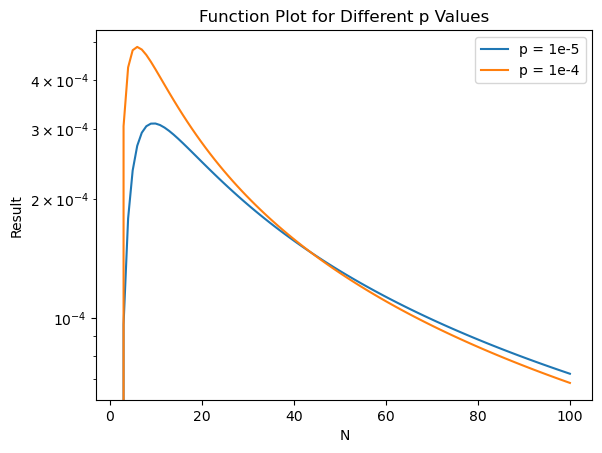

In [42]:
#LDPC
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(N, p, p0): 
    res = 1/N * (p0**((np.sqrt(N) - 1)/(np.sqrt(N))) * p **(1/(np.sqrt(N))) - p)
    return res

def func_new(N, p, p0):
    '''
    
    k>\frac{1}{2N}*\left(p_0^{\frac{\sqrt{N}-\sqrt{2}}{\sqrt{N}}}p^{\frac{\sqrt{2}}{\sqrt{N}}}-p\right)'''
    res = 16/(2*N) * (p0**((np.sqrt(N) - np.sqrt(2))/(np.sqrt(N))) * p **(np.sqrt(2)/(np.sqrt(N))) - p)
    return res

def func_ldpc(N, p, p0):
    '''$$ k> \frac{16}{2N} ((\frac{p}{p0})^\frac{2}{N}  p0 - p)'''
    k = 16/(2*N) * ((p/p0)**(2/N) * p0 - p)
    return k

def k_below_threshold(N, p, p0):
    '''Random read fidelity is below threshold'''
    k = (p0 - p)/(2*N)*16
    return k

# Example parameters
p0 = 1e-3
p1 = 1e-5
p2 = 1e-4
p3 = 1e-3

# Generate data
xlist = np.linspace(2, 100, 100)
ylist1 = [func_ldpc(x, p1, p0) for x in xlist]
ylist2 = [func_ldpc(x, p2, p0) for x in xlist]
ylist3 = [func_ldpc(x, p3, p0) for x in xlist]
# ylist4 = [k_below_threshold(x, p1, p0) for x in xlist]

# Plot the data
plt.plot(xlist, ylist1, label='p = 1e-5')
plt.plot(xlist, ylist2, label='p = 1e-4')
# plt.plot(xlist, ylist3, label='p = 1e-3')
# plt.plot(xlist, ylist4, label='error per processor gate threshold')
plt.xlabel('N')
plt.yscale('log')
plt.ylabel('Result')
plt.title('Function Plot for Different p Values')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.show()

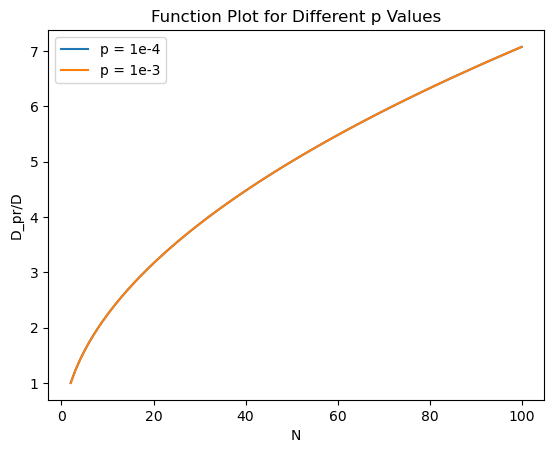

In [41]:
def processor_size_ratio(N, p, p0): 
    '''D'/D = ln(p/p0)/ ln((p+ 2Nk)/p0) '''
    return np.log(p/p0)/ np.log((p+ (2*N/16)*func_new(N, p, p0))/p0)

# Example parameters
p0 = 1e-2
p1 = 1e-4
p2 = 1e-3

# Generate data
xlist = np.linspace(2, 100, 100)
ylist1 = [processor_size_ratio(x, p1, p0) for x in xlist]
ylist2 = [processor_size_ratio(x, p2, p0) for x in xlist]

# Plot the data
plt.plot(xlist, ylist1, label='p = 1e-4')
plt.plot(xlist, ylist2, label='p = 1e-3')
plt.xlabel('N')
plt.ylabel('D_pr/D')
plt.title('Function Plot for Different p Values')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.show()

In [ ]:
D = 20 
D_pr = 

### Now check in presence of idle gates 

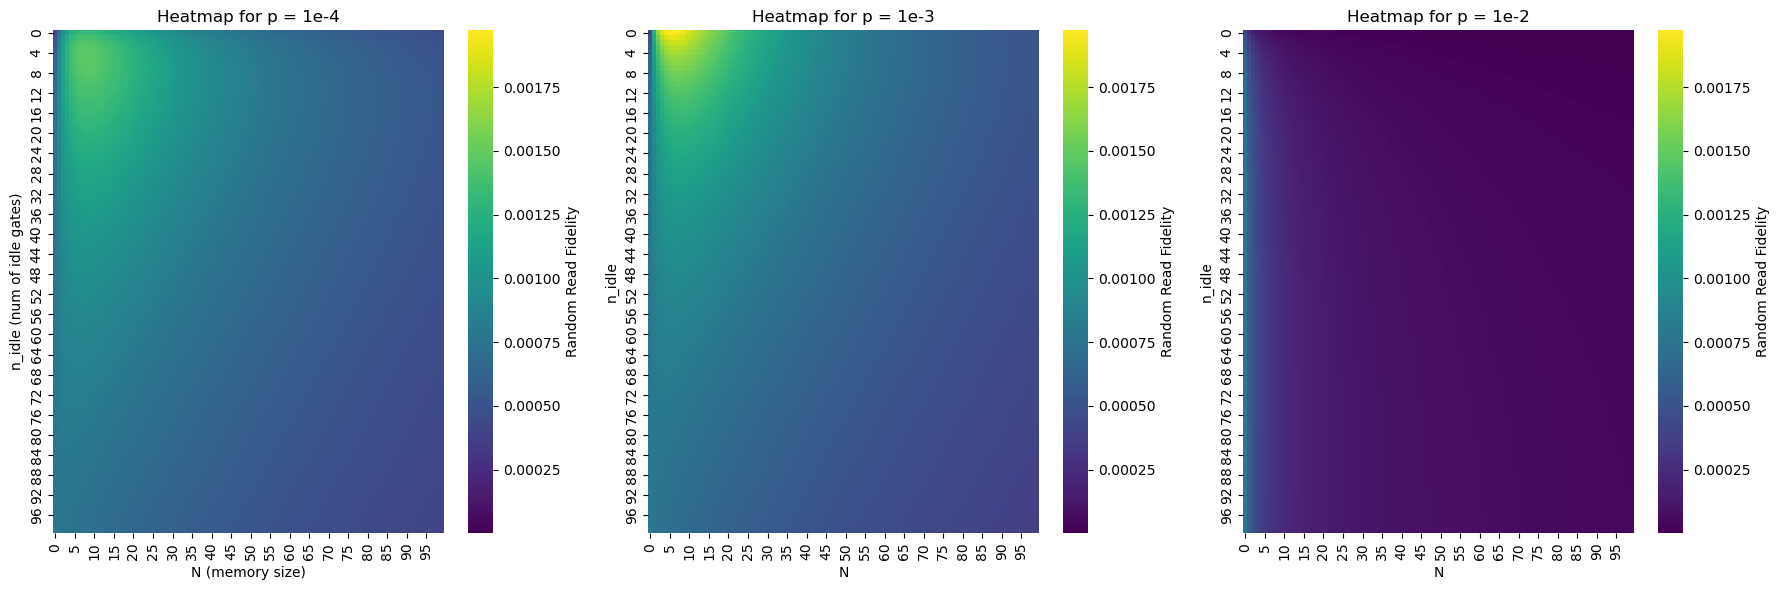

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def func_new(N, n_idle, p, p0, p_idle):
    '''k<\frac{1}{2N}*\left(p_0^{\frac{\sqrt{N}-\sqrt{2}}{\sqrt{N}}}p^{\frac{\sqrt{2}}{\sqrt{N}}}-p\right)'''
    p_eff = p + n_idle * p_idle
    N_eff = N + n_idle
    res = 16/(2*N_eff) * (p0**((np.sqrt(N) - np.sqrt(2))/(np.sqrt(N))) * p_eff **(np.sqrt(2)/(np.sqrt(N))) - p)
    return res

# Example parameters
p0 = 1e-2
p_idle = 1e-4 # 10 ns gate with 500 mus lifetime

p1 = 1e-4
p2 = 1e-3
p3 = 1e-2

# Generate data
N_values = np.linspace(2, 100, 100)
n_idle_values = np.linspace(2, 100, 100)

# Create a meshgrid for N and n_idle
N_grid, n_idle_grid = np.meshgrid(N_values, n_idle_values)

# Calculate the function values for each p
Z1 = func_new(N_grid, n_idle_grid, p1, p0, p_idle)
Z2 = func_new(N_grid, n_idle_grid, p2, p0, p_idle)
Z3 = func_new(N_grid, n_idle_grid, p3, p0, p_idle)

# Determine the common color scale range
vmin = min(Z1.min(), Z2.min(), Z3.min())
vmax = max(Z1.max(), Z2.max(), Z3.max())

# Plot the heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(Z1, ax=axes[0], cmap='viridis', cbar=True, cbar_kws={'label': 'Random Read Fidelity'}, vmin=vmin, vmax=vmax)
axes[0].set_title('Heatmap for p = 1e-4')
axes[0].set_xlabel('N (memory size)')
axes[0].set_ylabel('n_idle (num of idle gates)')

sns.heatmap(Z2, ax=axes[1], cmap='viridis', cbar=True, cbar_kws={'label': 'Random Read Fidelity'}, vmin=vmin, vmax=vmax)
axes[1].set_title('Heatmap for p = 1e-3')
axes[1].set_xlabel('N')
axes[1].set_ylabel('n_idle')

sns.heatmap(Z3, ax=axes[2], cmap='viridis', cbar=True, cbar_kws={'label': 'Random Read Fidelity'}, vmin=vmin, vmax=vmax)
axes[2].set_title('Heatmap for p = 1e-2')
axes[2].set_xlabel('N')
axes[2].set_ylabel('n_idle')

plt.tight_layout()
plt.show()

In [28]:
0.01/500

2e-05